In Model M1 we made a customer churn prediction with the help of XGboost in which kilometer_cleaned where induted with the help of Xgboost, 
In Model M2 Customer churn will be predicted without  intuting and with missing values of Kilometer_clean usidng LightGBM

In [2]:
#importing all required python librabries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_columns', None)
import optuna 

d:\temp\IV_Master_thesis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
df= pd.read_csv('D:\IV_Mastertheis\df_missing_kilometerstand.csv')

In [21]:
df.head()

,pvsnr,vsnr,status,aktiv,akt_kuka,spartek,beginn,datum_s,vtr_dau,kund_beg,vtrweg,gesbeitr,SDANZAHL,SCHAGESA,KOSTGESA,KOSTGEKA,kosten_verw,kosten_prov,gfeld,ort,plz,alter,anr,SDBEITR5,HERSTELLER,HSN,TSN,ELEKTRO,KILOMETERSTAND_CLEAN,claim,ersz_final,beg_year,beg_month,beg_day,weekday,Quarter,Weekday_id,Cus_type,Cus_typ_id,ort_id,Sex_id,Sex,gender_id,plz_id,Hersteller_id,state,state_id,status_id,First_reg,Car_age_indays,carage_years,TSN_id,estimated_total_paid
0,1012223,01012223-003,Aktiv,1,1,1,2013-06-16,NaN,4306.0,17.09.1969,1,110.00,0.0,0.00,0.00,0.00,70.54,41.38,70270/ Privatkunden,Flensburg,24944,83.0,71296/ Frau,404.26,VOLKSWAGEN-VW,603.0,1346.0,1,104982.0,0,16JUN2009,2013,6,16,Sunday,2,1,70270,1,1,71296,Frau,1,1,1,Schleswig-Holstein,1,1,2009-06-16,5847,16.0,1,953.832088
1,1012223,01012223-003,Aktiv,1,1,2,2013-06-16,NaN,4306.0,17.09.1969,1,253.96,0.0,0.00,0.00,0.00,186.81,89.36,70270/ Privatkunden,Flensburg,24944,83.0,71296/ Frau,1076.16,VOLKSWAGEN-VW,603.0,1346.0,1,104982.0,0,16JUN2009,2013,6,16,Sunday,2,1,70270,1,1,71296,Frau,1,1,1,Schleswig-Holstein,1,1,2009-06-16,5847,16.0,1,2539.147923
2,1013206,01013206-003,Aktiv,1,1,1,2013-01-01,NaN,4472.0,21.07.1977,1,313.58,0.0,0.00,0.00,0.00,232.13,135.88,70270/ Privatkunden,Sieverstedt,24885,74.0,71295/ Herr,1327.05,BMW BAYERISCHE MOTORENWER,5.0,2842.0,1,35000.0,0,11DEC2020,2013,1,1,Tuesday,1,2,70270,1,3,71295,Herr,3,3,3,Schleswig-Holstein,1,1,2020-12-11,1651,5.0,2,3251.817863
3,1013206,01013206-003,Aktiv,1,1,2,2013-01-01,NaN,4472.0,21.07.1977,1,95.42,1.0,3481.01,3481.01,4402.64,82.90,39.66,70270/ Privatkunden,Sieverstedt,24885,74.0,71295/ Herr,478.44,BMW BAYERISCHE MOTORENWER,5.0,2842.0,1,35000.0,1,11DEC2020,2013,1,1,Tuesday,1,2,70270,1,3,71295,Herr,3,3,3,Schleswig-Holstein,1,1,2020-12-11,1651,5.0,2,1172.374619
4,1013242,01013242-004,Aktiv,1,1,2,2012-01-01,NaN,4838.0,26.09.1975,1,212.80,0.0,0.00,0.00,0.00,155.16,74.26,70270/ Privatkunden,Lrschau,24850,82.0,71296/ Frau,894.10,NISSAN (J),1329.0,1104.0,1,28000.0,0,02APR2009,2012,1,1,Sunday,1,1,70270,1,4,71296,Frau,1,4,2,Schleswig-Holstein,1,1,2009-04-02,5922,16.0,3,2370.222356


In [22]:
df.isnull().sum()

pvsnr                        0
vsnr                         0
status                       0
aktiv                        0
akt_kuka                     0
spartek                      0
beginn                       0
datum_s                 999192
vtr_dau                      0
kund_beg                     0
vtrweg                       0
gesbeitr                     0
SDANZAHL                     0
SCHAGESA                     0
KOSTGESA                     0
KOSTGEKA                     0
kosten_verw                  0
kosten_prov                  0
gfeld                        0
ort                          0
plz                          0
alter                        0
anr                          0
SDBEITR5                     0
HERSTELLER                   0
HSN                         19
TSN                          0
ELEKTRO                      0
KILOMETERSTAND_CLEAN    380244
claim                        0
ersz_final                   0
beg_year                     0
beg_mont

In [23]:
df.shape

(2335742, 53)

In [24]:
df['Dura_in_yrs'] = df['vtr_dau'] // 365
df = df[df['carage_years'] < 13]
columns_needed = [
    "vsnr",'aktiv', "vtr_dau","Dura_in_yrs", "vtrweg", "SDANZAHL", "SCHAGESA", "KOSTGESA",
    "kosten_verw", "kosten_prov", "alter", "ELEKTRO", "KILOMETERSTAND_CLEAN",
    "claim", "beg_year", "beg_month", "Quarter", "Weekday_id", "Cus_typ_id",
    "ort_id", "gender_id", "plz_id", "Hersteller_id", "state_id", "TSN_id",
    "estimated_total_paid",'spartek','carage_years','Car_age_indays']

In [25]:
df.shape

(1040849, 54)

In [26]:
df= df[columns_needed]

In [27]:
# PART 1: SETUP AND DATA PREPARATION
# Run this first to set up your data

import pandas as pd
import numpy as np
import optuna
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, accuracy_score
import lightgbm as lgb

# ✅ 1. Select features and target
selected_features = [ 
    "estimated_total_paid",
    "carage_years",
    "kosten_verw", 
    "kosten_prov", 
    "alter", 
    "KILOMETERSTAND_CLEAN", 
    "claim",
    "state_id",
    "plz_id",
    "Cus_typ_id"
]
target = 'aktiv'

print("🚀 Starting Enhanced LightGBM Training with Optuna")
print(f"📊 Features: {len(selected_features)}")
print(f"🎯 Target: {target}")

# ✅ 2. Prepare data (changed from df_imp to df)
df_model = df[selected_features + [target]].dropna()
print(f"📈 Dataset shape after cleaning: {df_model.shape}")
print(f"🎲 Target distribution:\n{df_model[target].value_counts(normalize=True)}")

X = df_model[selected_features]
y = df_model[target]

# Identify categorical features for LightGBM
categorical_features = []
for col in selected_features:
    if X[col].dtype == 'object' or col.endswith('_id'):
        categorical_features.append(col)
        
print(f"🏷️ Categorical features detected: {categorical_features}")

# ✅ 3. Split data strategically
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.11, random_state=42, stratify=y_temp
)

print(f"📊 Data splits:")
print(f"   Training: {X_train.shape[0]} samples")
print(f"   Validation: {X_val.shape[0]} samples") 
print(f"   Test: {X_test.shape[0]} samples")

# ✅ 4. Enhanced Optuna objective function for LightGBM
def objective(trial):
    """
    Enhanced objective function with regularization focus to combat overfitting
    """
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 0.9),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 0.9),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.1, 3.0),  # L1 regularization
        'lambda_l2': trial.suggest_float('lambda_l2', 0.1, 3.0),  # L2 regularization
        'min_gain_to_split': trial.suggest_float('min_gain_to_split', 0, 2),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'verbosity': -1,
        'random_state': 42,
        'n_jobs': -1
    }
    
    # Use cross-validation for robust evaluation
    model = lgb.LGBMClassifier(**params, n_estimators=200)
    cv_scores = cross_val_score(
        model, X_train, y_train, 
        cv=3,  # 3-fold CV for speed
        scoring='f1',
        n_jobs=-1
    )
    
    return cv_scores.mean()

# ✅ 5. Run Optuna optimization with progress tracking
def print_callback(study, trial):
    """Callback to print progress"""
    print(f"⚡ Trial {trial.number:3d}: F1 = {trial.value:.4f} | Best = {study.best_value:.4f}")

print("\n🔍 Starting hyperparameter optimization...")
study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42)
)

n_trials = 100  

study.optimize(
    objective, 
    n_trials=n_trials,
    callbacks=[print_callback],
    show_progress_bar=True
)

print(f"\n🎯 Optimization completed!")
print(f"🏆 Best F1-Score: {study.best_value:.4f}")
print(f"📋 Best Parameters:")
for key, value in study.best_params.items():
    print(f"   {key}: {value}")

print("✅ Part 2 completed! Best parameters found.")

🚀 Starting Enhanced LightGBM Training with Optuna
📊 Features: 10
🎯 Target: aktiv
📈 Dataset shape after cleaning: (877729, 11)
🎲 Target distribution:
aktiv
0    0.504453
1    0.495547
Name: proportion, dtype: float64
🏷️ Categorical features detected: ['state_id', 'plz_id', 'Cus_typ_id']


[I 2025-06-19 14:37:35,763] A new study created in memory with name: no-name-10c66d04-1480-4f3f-ba6e-53c4b931adb6


📊 Data splits:
   Training: 703060 samples
   Validation: 86896 samples
   Test: 87773 samples

🔍 Starting hyperparameter optimization...


Best trial: 0. Best value: 0.821725:   1%|          | 1/100 [00:13<21:33, 13.06s/it]

[I 2025-06-19 14:37:48,838] Trial 0 finished with value: 0.8217246514402232 and parameters: {'num_leaves': 44, 'learning_rate': 0.19063571821788408, 'feature_fraction': 0.8195981825434215, 'bagging_fraction': 0.779597545259111, 'bagging_freq': 2, 'min_child_samples': 12, 'lambda_l1': 0.2684424752877784, 'lambda_l2': 2.611910822747312, 'min_gain_to_split': 1.2022300234864176, 'max_depth': 7}. Best is trial 0 with value: 0.8217246514402232.
⚡ Trial   0: F1 = 0.8217 | Best = 0.8217


Best trial: 0. Best value: 0.821725:   2%|▏         | 2/100 [00:21<16:51, 10.32s/it]

[I 2025-06-19 14:37:57,230] Trial 1 finished with value: 0.8081093586660749 and parameters: {'num_leaves': 11, 'learning_rate': 0.19428287191077892, 'feature_fraction': 0.8497327922401265, 'bagging_fraction': 0.6637017332034828, 'bagging_freq': 2, 'min_child_samples': 13, 'lambda_l1': 0.9823025045826593, 'lambda_l2': 1.6217936517334899, 'min_gain_to_split': 0.8638900372842315, 'max_depth': 4}. Best is trial 0 with value: 0.8217246514402232.
⚡ Trial   1: F1 = 0.8081 | Best = 0.8217


Best trial: 0. Best value: 0.821725:   3%|▎         | 3/100 [00:30<15:46,  9.76s/it]

[I 2025-06-19 14:38:06,331] Trial 2 finished with value: 0.7867132626588543 and parameters: {'num_leaves': 65, 'learning_rate': 0.036503833523887946, 'feature_fraction': 0.6876433945605654, 'bagging_fraction': 0.7099085529881075, 'bagging_freq': 4, 'min_child_samples': 41, 'lambda_l1': 0.6790539682592432, 'lambda_l2': 1.5912798713994738, 'min_gain_to_split': 1.184829137724085, 'max_depth': 3}. Best is trial 0 with value: 0.8217246514402232.
⚡ Trial   2: F1 = 0.7867 | Best = 0.8217


Best trial: 0. Best value: 0.821725:   4%|▍         | 4/100 [00:41<16:34, 10.36s/it]

[I 2025-06-19 14:38:17,619] Trial 3 finished with value: 0.8016466343261165 and parameters: {'num_leaves': 65, 'learning_rate': 0.04239958350058539, 'feature_fraction': 0.6195154778955838, 'bagging_fraction': 0.884665661176, 'bagging_freq': 7, 'min_child_samples': 42, 'lambda_l1': 0.983379930602775, 'lambda_l2': 0.3832491306185132, 'min_gain_to_split': 1.3684660530243138, 'max_depth': 5}. Best is trial 0 with value: 0.8217246514402232.
⚡ Trial   3: F1 = 0.8016 | Best = 0.8217


Best trial: 0. Best value: 0.821725:   5%|▌         | 5/100 [00:49<14:59,  9.47s/it]

[I 2025-06-19 14:38:25,510] Trial 4 finished with value: 0.8040001412671524 and parameters: {'num_leaves': 21, 'learning_rate': 0.10408361292114134, 'feature_fraction': 0.6103165563345655, 'bagging_fraction': 0.8727961206236347, 'bagging_freq': 2, 'min_child_samples': 35, 'lambda_l1': 1.0039621206592917, 'lambda_l2': 1.6081972614156514, 'min_gain_to_split': 1.0934205586865593, 'max_depth': 4}. Best is trial 0 with value: 0.8217246514402232.
⚡ Trial   4: F1 = 0.8040 | Best = 0.8217


Best trial: 0. Best value: 0.821725:   6%|▌         | 6/100 [00:56<13:28,  8.60s/it]

[I 2025-06-19 14:38:32,427] Trial 5 finished with value: 0.8081644160898761 and parameters: {'num_leaves': 98, 'learning_rate': 0.15727523643861177, 'feature_fraction': 0.8818496824692568, 'bagging_fraction': 0.8684482051282947, 'bagging_freq': 5, 'min_child_samples': 47, 'lambda_l1': 0.3566282559505666, 'lambda_l2': 0.6683503010155211, 'min_gain_to_split': 0.09045457782107613, 'max_depth': 4}. Best is trial 0 with value: 0.8217246514402232.
⚡ Trial   5: F1 = 0.8082 | Best = 0.8217


Best trial: 0. Best value: 0.821725:   7%|▋         | 7/100 [01:06<14:09,  9.14s/it]

[I 2025-06-19 14:38:42,667] Trial 6 finished with value: 0.8127616987403838 and parameters: {'num_leaves': 45, 'learning_rate': 0.061556316037040225, 'feature_fraction': 0.8486212527455788, 'bagging_fraction': 0.7070259980080768, 'bagging_freq': 2, 'min_child_samples': 29, 'lambda_l1': 0.5086802524268117, 'lambda_l2': 2.426371244186715, 'min_gain_to_split': 0.14910128735954165, 'max_depth': 8}. Best is trial 0 with value: 0.8217246514402232.
⚡ Trial   6: F1 = 0.8128 | Best = 0.8217


Best trial: 0. Best value: 0.821725:   8%|▊         | 8/100 [01:12<12:27,  8.13s/it]

[I 2025-06-19 14:38:48,638] Trial 7 finished with value: 0.789063130938445 and parameters: {'num_leaves': 80, 'learning_rate': 0.04775597949149276, 'feature_fraction': 0.6016566351370807, 'bagging_fraction': 0.8446384285364503, 'bagging_freq': 5, 'min_child_samples': 38, 'lambda_l1': 2.336684005389243, 'lambda_l2': 0.3147294900288621, 'min_gain_to_split': 0.7169314570885452, 'max_depth': 3}. Best is trial 0 with value: 0.8217246514402232.
⚡ Trial   7: F1 = 0.7891 | Best = 0.8217


Best trial: 0. Best value: 0.821725:   9%|▉         | 9/100 [01:19<11:49,  7.80s/it]

[I 2025-06-19 14:38:55,701] Trial 8 finished with value: 0.809891586689858 and parameters: {'num_leaves': 88, 'learning_rate': 0.128426644097236, 'feature_fraction': 0.6992694074557948, 'bagging_fraction': 0.6190675050858071, 'bagging_freq': 3, 'min_child_samples': 19, 'lambda_l1': 2.215857917180386, 'lambda_l2': 1.9489166669301181, 'min_gain_to_split': 1.774425485152653, 'max_depth': 5}. Best is trial 0 with value: 0.8217246514402232.
⚡ Trial   8: F1 = 0.8099 | Best = 0.8217


Best trial: 0. Best value: 0.821725:  10%|█         | 10/100 [01:25<10:27,  6.97s/it]

[I 2025-06-19 14:39:00,813] Trial 9 finished with value: 0.8025327540527135 and parameters: {'num_leaves': 20, 'learning_rate': 0.14551650957236906, 'feature_fraction': 0.8282355145850693, 'bagging_fraction': 0.7683831592708489, 'bagging_freq': 6, 'min_child_samples': 27, 'lambda_l1': 1.6159252052077828, 'lambda_l2': 1.339868953239794, 'min_gain_to_split': 0.05083825348819038, 'max_depth': 3}. Best is trial 0 with value: 0.8217246514402232.
⚡ Trial   9: F1 = 0.8025 | Best = 0.8217


Best trial: 0. Best value: 0.821725:  11%|█         | 11/100 [01:31<10:14,  6.91s/it]

[I 2025-06-19 14:39:07,585] Trial 10 finished with value: 0.81657150628908 and parameters: {'num_leaves': 44, 'learning_rate': 0.18724377998959227, 'feature_fraction': 0.7777093115363782, 'bagging_fraction': 0.7962507917821569, 'bagging_freq': 1, 'min_child_samples': 6, 'lambda_l1': 2.8833351632417186, 'lambda_l2': 2.930805709588186, 'min_gain_to_split': 1.8939237527802988, 'max_depth': 8}. Best is trial 0 with value: 0.8217246514402232.
⚡ Trial  10: F1 = 0.8166 | Best = 0.8217


Best trial: 0. Best value: 0.821725:  12%|█▏        | 12/100 [01:38<10:06,  6.89s/it]

[I 2025-06-19 14:39:14,448] Trial 11 finished with value: 0.8159389722289269 and parameters: {'num_leaves': 41, 'learning_rate': 0.18970384679500554, 'feature_fraction': 0.7831899423567357, 'bagging_fraction': 0.794014447590537, 'bagging_freq': 1, 'min_child_samples': 5, 'lambda_l1': 2.9737559306422403, 'lambda_l2': 2.996930753720212, 'min_gain_to_split': 1.8993202484538119, 'max_depth': 8}. Best is trial 0 with value: 0.8217246514402232.
⚡ Trial  11: F1 = 0.8159 | Best = 0.8217


Best trial: 0. Best value: 0.821725:  13%|█▎        | 13/100 [01:46<10:14,  7.06s/it]

[I 2025-06-19 14:39:21,882] Trial 12 finished with value: 0.8180905703375685 and parameters: {'num_leaves': 38, 'learning_rate': 0.17311077285988852, 'feature_fraction': 0.7827221590301234, 'bagging_fraction': 0.8072736437500273, 'bagging_freq': 1, 'min_child_samples': 6, 'lambda_l1': 1.7587870290663785, 'lambda_l2': 2.9884479420675634, 'min_gain_to_split': 1.4306523474491086, 'max_depth': 7}. Best is trial 0 with value: 0.8217246514402232.
⚡ Trial  12: F1 = 0.8181 | Best = 0.8217


Best trial: 0. Best value: 0.821725:  14%|█▍        | 14/100 [01:56<11:32,  8.06s/it]

[I 2025-06-19 14:39:32,250] Trial 13 finished with value: 0.8116409108328746 and parameters: {'num_leaves': 32, 'learning_rate': 0.08921567558222511, 'feature_fraction': 0.735389855487743, 'bagging_fraction': 0.8226888948303281, 'bagging_freq': 3, 'min_child_samples': 15, 'lambda_l1': 1.6505763915516118, 'lambda_l2': 2.3560489080210436, 'min_gain_to_split': 1.511556899151709, 'max_depth': 7}. Best is trial 0 with value: 0.8217246514402232.
⚡ Trial  13: F1 = 0.8116 | Best = 0.8217


Best trial: 14. Best value: 0.823705:  15%|█▌        | 15/100 [02:05<11:50,  8.36s/it]

[I 2025-06-19 14:39:41,314] Trial 14 finished with value: 0.8237050766709353 and parameters: {'num_leaves': 59, 'learning_rate': 0.16322151712406838, 'feature_fraction': 0.7996282122617545, 'bagging_fraction': 0.7393172740640864, 'bagging_freq': 1, 'min_child_samples': 12, 'lambda_l1': 2.019133622390162, 'lambda_l2': 2.5255624439360393, 'min_gain_to_split': 0.5913861016719708, 'max_depth': 7}. Best is trial 14 with value: 0.8237050766709353.
⚡ Trial  14: F1 = 0.8237 | Best = 0.8237


Best trial: 14. Best value: 0.823705:  16%|█▌        | 16/100 [02:14<11:56,  8.53s/it]

[I 2025-06-19 14:39:50,239] Trial 15 finished with value: 0.816047218103023 and parameters: {'num_leaves': 61, 'learning_rate': 0.13423755963456926, 'feature_fraction': 0.8993794670696741, 'bagging_fraction': 0.7316966231477721, 'bagging_freq': 3, 'min_child_samples': 22, 'lambda_l1': 0.16576175225274437, 'lambda_l2': 2.417212196205198, 'min_gain_to_split': 0.5101141384277922, 'max_depth': 6}. Best is trial 14 with value: 0.8237050766709353.
⚡ Trial  15: F1 = 0.8160 | Best = 0.8237


Best trial: 16. Best value: 0.825106:  17%|█▋        | 17/100 [02:23<12:09,  8.80s/it]

[I 2025-06-19 14:39:59,649] Trial 16 finished with value: 0.8251055708559606 and parameters: {'num_leaves': 75, 'learning_rate': 0.16392483409401593, 'feature_fraction': 0.8142866147567633, 'bagging_fraction': 0.7568971810492274, 'bagging_freq': 2, 'min_child_samples': 12, 'lambda_l1': 2.1255998085149894, 'lambda_l2': 2.1000558331141255, 'min_gain_to_split': 0.4659806200742789, 'max_depth': 7}. Best is trial 16 with value: 0.8251055708559606.
⚡ Trial  16: F1 = 0.8251 | Best = 0.8251


Best trial: 16. Best value: 0.825106:  18%|█▊        | 18/100 [02:31<11:29,  8.40s/it]

[I 2025-06-19 14:40:07,143] Trial 17 finished with value: 0.8174408142932865 and parameters: {'num_leaves': 78, 'learning_rate': 0.1613309508989999, 'feature_fraction': 0.7319186736346895, 'bagging_fraction': 0.6682070497762976, 'bagging_freq': 1, 'min_child_samples': 21, 'lambda_l1': 2.1300925106657327, 'lambda_l2': 2.002527119822456, 'min_gain_to_split': 0.41430173078648624, 'max_depth': 6}. Best is trial 16 with value: 0.8251055708559606.
⚡ Trial  17: F1 = 0.8174 | Best = 0.8251


Best trial: 16. Best value: 0.825106:  19%|█▉        | 19/100 [02:40<11:30,  8.52s/it]

[I 2025-06-19 14:40:15,946] Trial 18 finished with value: 0.8193084907523712 and parameters: {'num_leaves': 74, 'learning_rate': 0.12003546958158995, 'feature_fraction': 0.8065497086750016, 'bagging_fraction': 0.7399151434696863, 'bagging_freq': 4, 'min_child_samples': 11, 'lambda_l1': 2.622133354603304, 'lambda_l2': 1.1669727694822267, 'min_gain_to_split': 0.4094732470470681, 'max_depth': 7}. Best is trial 16 with value: 0.8251055708559606.
⚡ Trial  18: F1 = 0.8193 | Best = 0.8251


Best trial: 16. Best value: 0.825106:  20%|██        | 20/100 [02:48<11:24,  8.56s/it]

[I 2025-06-19 14:40:24,582] Trial 19 finished with value: 0.8117105812345784 and parameters: {'num_leaves': 54, 'learning_rate': 0.08345953515390764, 'feature_fraction': 0.7556476162459863, 'bagging_fraction': 0.677610919972705, 'bagging_freq': 3, 'min_child_samples': 28, 'lambda_l1': 1.9842070028338952, 'lambda_l2': 2.0060005425239744, 'min_gain_to_split': 0.6781843854432417, 'max_depth': 6}. Best is trial 16 with value: 0.8251055708559606.
⚡ Trial  19: F1 = 0.8117 | Best = 0.8251


Best trial: 20. Best value: 0.825172:  21%|██        | 21/100 [02:57<11:25,  8.68s/it]

[I 2025-06-19 14:40:33,557] Trial 20 finished with value: 0.8251722664775333 and parameters: {'num_leaves': 96, 'learning_rate': 0.1681943631050224, 'feature_fraction': 0.8622454922526357, 'bagging_fraction': 0.6014776266857917, 'bagging_freq': 2, 'min_child_samples': 18, 'lambda_l1': 2.5731983150945563, 'lambda_l2': 2.6480183190907964, 'min_gain_to_split': 0.28110088405309686, 'max_depth': 7}. Best is trial 20 with value: 0.8251722664775333.
⚡ Trial  20: F1 = 0.8252 | Best = 0.8252


Best trial: 20. Best value: 0.825172:  22%|██▏       | 22/100 [03:07<11:33,  8.89s/it]

[I 2025-06-19 14:40:42,932] Trial 21 finished with value: 0.825160148929568 and parameters: {'num_leaves': 100, 'learning_rate': 0.16511008962975093, 'feature_fraction': 0.868514537603807, 'bagging_fraction': 0.6213011299341776, 'bagging_freq': 2, 'min_child_samples': 17, 'lambda_l1': 2.4589106269210723, 'lambda_l2': 2.578620878696033, 'min_gain_to_split': 0.317527620455451, 'max_depth': 7}. Best is trial 20 with value: 0.8251722664775333.
⚡ Trial  21: F1 = 0.8252 | Best = 0.8252


Best trial: 22. Best value: 0.833464:  23%|██▎       | 23/100 [03:17<12:00,  9.36s/it]

[I 2025-06-19 14:40:53,373] Trial 22 finished with value: 0.8334641196640472 and parameters: {'num_leaves': 100, 'learning_rate': 0.17465108814125163, 'feature_fraction': 0.8689927786519993, 'bagging_fraction': 0.6012759155363465, 'bagging_freq': 2, 'min_child_samples': 19, 'lambda_l1': 2.453836458999568, 'lambda_l2': 2.729799169855729, 'min_gain_to_split': 0.2614865594922101, 'max_depth': 8}. Best is trial 22 with value: 0.8334641196640472.
⚡ Trial  22: F1 = 0.8335 | Best = 0.8335


Best trial: 22. Best value: 0.833464:  24%|██▍       | 24/100 [03:28<12:30,  9.87s/it]

[I 2025-06-19 14:41:04,438] Trial 23 finished with value: 0.8071006979699948 and parameters: {'num_leaves': 100, 'learning_rate': 0.01600811451606149, 'feature_fraction': 0.8695917876231107, 'bagging_fraction': 0.60365478093392, 'bagging_freq': 3, 'min_child_samples': 24, 'lambda_l1': 2.5776514928794843, 'lambda_l2': 2.7301222492486814, 'min_gain_to_split': 0.2564518454325672, 'max_depth': 8}. Best is trial 22 with value: 0.8334641196640472.
⚡ Trial  23: F1 = 0.8071 | Best = 0.8335


Best trial: 22. Best value: 0.833464:  25%|██▌       | 25/100 [03:39<12:32, 10.04s/it]

[I 2025-06-19 14:41:14,877] Trial 24 finished with value: 0.8292185863971633 and parameters: {'num_leaves': 90, 'learning_rate': 0.142549415160547, 'feature_fraction': 0.8596160870445, 'bagging_fraction': 0.6333390436658121, 'bagging_freq': 2, 'min_child_samples': 17, 'lambda_l1': 2.5065305563170726, 'lambda_l2': 2.7312032498944467, 'min_gain_to_split': 0.2664564297913512, 'max_depth': 8}. Best is trial 22 with value: 0.8334641196640472.
⚡ Trial  24: F1 = 0.8292 | Best = 0.8335


Best trial: 22. Best value: 0.833464:  26%|██▌       | 26/100 [03:48<12:12,  9.89s/it]

[I 2025-06-19 14:41:24,434] Trial 25 finished with value: 0.823859090738683 and parameters: {'num_leaves': 91, 'learning_rate': 0.14344674596104282, 'feature_fraction': 0.8441221984886723, 'bagging_fraction': 0.6435856710303259, 'bagging_freq': 4, 'min_child_samples': 25, 'lambda_l1': 2.677031838643015, 'lambda_l2': 2.211273623943159, 'min_gain_to_split': 0.8809729309184768, 'max_depth': 8}. Best is trial 22 with value: 0.8334641196640472.
⚡ Trial  25: F1 = 0.8239 | Best = 0.8335


Best trial: 22. Best value: 0.833464:  27%|██▋       | 27/100 [03:58<11:59,  9.85s/it]

[I 2025-06-19 14:41:34,193] Trial 26 finished with value: 0.8231095626460574 and parameters: {'num_leaves': 88, 'learning_rate': 0.11462946465828006, 'feature_fraction': 0.895562324271082, 'bagging_fraction': 0.6007037226292646, 'bagging_freq': 3, 'min_child_samples': 32, 'lambda_l1': 2.8603484680389752, 'lambda_l2': 2.7744221035990098, 'min_gain_to_split': 0.23727778337621225, 'max_depth': 8}. Best is trial 22 with value: 0.8334641196640472.
⚡ Trial  26: F1 = 0.8231 | Best = 0.8335


Best trial: 22. Best value: 0.833464:  28%|██▊       | 28/100 [04:08<11:55,  9.93s/it]

[I 2025-06-19 14:41:44,307] Trial 27 finished with value: 0.8326164887564431 and parameters: {'num_leaves': 93, 'learning_rate': 0.17526159813118194, 'feature_fraction': 0.8664968295109315, 'bagging_fraction': 0.6380111374182745, 'bagging_freq': 2, 'min_child_samples': 17, 'lambda_l1': 2.3956562966079757, 'lambda_l2': 2.7805752905102743, 'min_gain_to_split': 0.020696877938192637, 'max_depth': 8}. Best is trial 22 with value: 0.8334641196640472.
⚡ Trial  27: F1 = 0.8326 | Best = 0.8335


Best trial: 22. Best value: 0.833464:  29%|██▉       | 29/100 [04:19<11:57, 10.11s/it]

[I 2025-06-19 14:41:54,832] Trial 28 finished with value: 0.8302231472207757 and parameters: {'num_leaves': 85, 'learning_rate': 0.17897323802881396, 'feature_fraction': 0.835244695374324, 'bagging_fraction': 0.6383154585920003, 'bagging_freq': 5, 'min_child_samples': 21, 'lambda_l1': 1.8189283282643147, 'lambda_l2': 2.231560921098382, 'min_gain_to_split': 0.03756496558344055, 'max_depth': 8}. Best is trial 22 with value: 0.8334641196640472.
⚡ Trial  28: F1 = 0.8302 | Best = 0.8335


Best trial: 22. Best value: 0.833464:  30%|███       | 30/100 [04:28<11:31,  9.88s/it]

[I 2025-06-19 14:42:04,179] Trial 29 finished with value: 0.8302506214062765 and parameters: {'num_leaves': 82, 'learning_rate': 0.1778039420047242, 'feature_fraction': 0.8336755616311213, 'bagging_fraction': 0.6517289145694263, 'bagging_freq': 5, 'min_child_samples': 22, 'lambda_l1': 1.3974725181886638, 'lambda_l2': 2.212692609384121, 'min_gain_to_split': 0.01806498088540424, 'max_depth': 8}. Best is trial 22 with value: 0.8334641196640472.
⚡ Trial  29: F1 = 0.8303 | Best = 0.8335


Best trial: 22. Best value: 0.833464:  31%|███       | 31/100 [04:36<10:42,  9.31s/it]

[I 2025-06-19 14:42:12,169] Trial 30 finished with value: 0.8200333965235557 and parameters: {'num_leaves': 82, 'learning_rate': 0.19616513522079856, 'feature_fraction': 0.883273260525318, 'bagging_fraction': 0.6997084021069994, 'bagging_freq': 6, 'min_child_samples': 9, 'lambda_l1': 1.3350365552692562, 'lambda_l2': 1.8182731129876981, 'min_gain_to_split': 0.0036360104695015473, 'max_depth': 6}. Best is trial 22 with value: 0.8334641196640472.
⚡ Trial  30: F1 = 0.8200 | Best = 0.8335


Best trial: 22. Best value: 0.833464:  32%|███▏      | 32/100 [04:45<10:25,  9.19s/it]

[I 2025-06-19 14:42:21,076] Trial 31 finished with value: 0.8319079460903526 and parameters: {'num_leaves': 84, 'learning_rate': 0.18110561982014386, 'feature_fraction': 0.8235034898682231, 'bagging_fraction': 0.6494829235554274, 'bagging_freq': 6, 'min_child_samples': 21, 'lambda_l1': 1.4098316345990876, 'lambda_l2': 2.2227590349908404, 'min_gain_to_split': 0.003954832686124756, 'max_depth': 8}. Best is trial 22 with value: 0.8334641196640472.
⚡ Trial  31: F1 = 0.8319 | Best = 0.8335


Best trial: 22. Best value: 0.833464:  33%|███▎      | 33/100 [04:54<10:23,  9.30s/it]

[I 2025-06-19 14:42:30,634] Trial 32 finished with value: 0.83065382358495 and parameters: {'num_leaves': 93, 'learning_rate': 0.18049532445950012, 'feature_fraction': 0.8251089047522002, 'bagging_fraction': 0.6544971534419848, 'bagging_freq': 6, 'min_child_samples': 24, 'lambda_l1': 1.3507451677309228, 'lambda_l2': 2.274870135631525, 'min_gain_to_split': 0.133623106681718, 'max_depth': 8}. Best is trial 22 with value: 0.8334641196640472.
⚡ Trial  32: F1 = 0.8307 | Best = 0.8335


Best trial: 22. Best value: 0.833464:  34%|███▍      | 34/100 [05:05<10:36,  9.64s/it]

[I 2025-06-19 14:42:41,063] Trial 33 finished with value: 0.8327200083226326 and parameters: {'num_leaves': 93, 'learning_rate': 0.1841076277902802, 'feature_fraction': 0.8223788414745513, 'bagging_fraction': 0.6823551417505713, 'bagging_freq': 7, 'min_child_samples': 32, 'lambda_l1': 1.2542031173991264, 'lambda_l2': 1.8307230351112094, 'min_gain_to_split': 0.173033881238156, 'max_depth': 8}. Best is trial 22 with value: 0.8334641196640472.
⚡ Trial  33: F1 = 0.8327 | Best = 0.8335


Best trial: 22. Best value: 0.833464:  35%|███▌      | 35/100 [05:14<10:17,  9.49s/it]

[I 2025-06-19 14:42:50,212] Trial 34 finished with value: 0.8329557331782476 and parameters: {'num_leaves': 72, 'learning_rate': 0.19814592744290643, 'feature_fraction': 0.7945152864969889, 'bagging_fraction': 0.6833684969148336, 'bagging_freq': 7, 'min_child_samples': 30, 'lambda_l1': 1.1733787201197292, 'lambda_l2': 1.8251676116196416, 'min_gain_to_split': 0.15824463205303674, 'max_depth': 8}. Best is trial 22 with value: 0.8334641196640472.
⚡ Trial  34: F1 = 0.8330 | Best = 0.8335


Best trial: 22. Best value: 0.833464:  36%|███▌      | 36/100 [05:22<09:43,  9.12s/it]

[I 2025-06-19 14:42:58,466] Trial 35 finished with value: 0.8279972748990437 and parameters: {'num_leaves': 72, 'learning_rate': 0.19507880662686797, 'feature_fraction': 0.7972748205903438, 'bagging_fraction': 0.6836608177912583, 'bagging_freq': 7, 'min_child_samples': 33, 'lambda_l1': 1.1768824764242736, 'lambda_l2': 1.026492278709862, 'min_gain_to_split': 0.1651798289964889, 'max_depth': 7}. Best is trial 22 with value: 0.8334641196640472.
⚡ Trial  35: F1 = 0.8280 | Best = 0.8335


Best trial: 22. Best value: 0.833464:  37%|███▋      | 37/100 [05:31<09:33,  9.10s/it]

[I 2025-06-19 14:43:07,516] Trial 36 finished with value: 0.8285467857347136 and parameters: {'num_leaves': 71, 'learning_rate': 0.1986413575449538, 'feature_fraction': 0.7644596033613716, 'bagging_fraction': 0.6877078138900674, 'bagging_freq': 7, 'min_child_samples': 32, 'lambda_l1': 1.0774556940236981, 'lambda_l2': 1.749571329617622, 'min_gain_to_split': 0.3506095911139183, 'max_depth': 7}. Best is trial 22 with value: 0.8334641196640472.
⚡ Trial  36: F1 = 0.8285 | Best = 0.8335


Best trial: 37. Best value: 0.833495:  38%|███▊      | 38/100 [05:41<09:40,  9.36s/it]

[I 2025-06-19 14:43:17,476] Trial 37 finished with value: 0.8334948019748462 and parameters: {'num_leaves': 95, 'learning_rate': 0.19986364169234963, 'feature_fraction': 0.6532787710164852, 'bagging_fraction': 0.7159584123728306, 'bagging_freq': 7, 'min_child_samples': 37, 'lambda_l1': 0.8025055572736168, 'lambda_l2': 1.5352957585437774, 'min_gain_to_split': 0.5469696745156003, 'max_depth': 8}. Best is trial 37 with value: 0.8334948019748462.
⚡ Trial  37: F1 = 0.8335 | Best = 0.8335


Best trial: 37. Best value: 0.833495:  39%|███▉      | 39/100 [05:48<08:53,  8.74s/it]

[I 2025-06-19 14:43:24,770] Trial 38 finished with value: 0.8108533464310375 and parameters: {'num_leaves': 66, 'learning_rate': 0.14912214828918952, 'feature_fraction': 0.6634073410847846, 'bagging_fraction': 0.7184913084415353, 'bagging_freq': 7, 'min_child_samples': 38, 'lambda_l1': 0.8431617585072568, 'lambda_l2': 1.4673177270533955, 'min_gain_to_split': 0.9391081514431616, 'max_depth': 5}. Best is trial 37 with value: 0.8334948019748462.
⚡ Trial  38: F1 = 0.8109 | Best = 0.8335


Best trial: 37. Best value: 0.833495:  40%|████      | 40/100 [06:00<09:25,  9.43s/it]

[I 2025-06-19 14:43:35,809] Trial 39 finished with value: 0.8322186246474789 and parameters: {'num_leaves': 96, 'learning_rate': 0.19886417810675608, 'feature_fraction': 0.6592826977621242, 'bagging_fraction': 0.7162554572470243, 'bagging_freq': 7, 'min_child_samples': 40, 'lambda_l1': 0.7173124214094526, 'lambda_l2': 0.8732206840790964, 'min_gain_to_split': 0.7379431479631614, 'max_depth': 8}. Best is trial 37 with value: 0.8334948019748462.
⚡ Trial  39: F1 = 0.8322 | Best = 0.8335


Best trial: 37. Best value: 0.833495:  41%|████      | 41/100 [06:09<09:14,  9.39s/it]

[I 2025-06-19 14:43:45,116] Trial 40 finished with value: 0.8198925937539148 and parameters: {'num_leaves': 87, 'learning_rate': 0.1552954357212955, 'feature_fraction': 0.6280856731413678, 'bagging_fraction': 0.6973997004456237, 'bagging_freq': 6, 'min_child_samples': 45, 'lambda_l1': 0.5570959034758065, 'lambda_l2': 1.4350888838249045, 'min_gain_to_split': 0.557532519923044, 'max_depth': 7}. Best is trial 37 with value: 0.8334948019748462.
⚡ Trial  40: F1 = 0.8199 | Best = 0.8335


Best trial: 37. Best value: 0.833495:  42%|████▏     | 42/100 [06:18<09:03,  9.38s/it]

[I 2025-06-19 14:43:54,452] Trial 41 finished with value: 0.8315001609626246 and parameters: {'num_leaves': 94, 'learning_rate': 0.1846733290422163, 'feature_fraction': 0.7003763436740617, 'bagging_fraction': 0.6703528821288329, 'bagging_freq': 7, 'min_child_samples': 35, 'lambda_l1': 0.8687328654516238, 'lambda_l2': 1.785880432805517, 'min_gain_to_split': 0.16236115931976824, 'max_depth': 8}. Best is trial 37 with value: 0.8334948019748462.
⚡ Trial  41: F1 = 0.8315 | Best = 0.8335


Best trial: 37. Best value: 0.833495:  43%|████▎     | 43/100 [06:28<09:00,  9.48s/it]

[I 2025-06-19 14:44:04,187] Trial 42 finished with value: 0.8302309099532409 and parameters: {'num_leaves': 92, 'learning_rate': 0.17245891305683392, 'feature_fraction': 0.8463335942387545, 'bagging_fraction': 0.6238682413051666, 'bagging_freq': 7, 'min_child_samples': 29, 'lambda_l1': 1.207382282372828, 'lambda_l2': 1.2760945683298222, 'min_gain_to_split': 0.1797114027863947, 'max_depth': 8}. Best is trial 37 with value: 0.8334948019748462.
⚡ Trial  42: F1 = 0.8302 | Best = 0.8335


Best trial: 37. Best value: 0.833495:  44%|████▍     | 44/100 [06:37<08:49,  9.46s/it]

[I 2025-06-19 14:44:13,585] Trial 43 finished with value: 0.8327583094810945 and parameters: {'num_leaves': 96, 'learning_rate': 0.18829677881769696, 'feature_fraction': 0.8793074228091217, 'bagging_fraction': 0.6641758843171228, 'bagging_freq': 6, 'min_child_samples': 50, 'lambda_l1': 0.905520153188514, 'lambda_l2': 1.6362068020380498, 'min_gain_to_split': 0.373284639263294, 'max_depth': 8}. Best is trial 37 with value: 0.8334948019748462.
⚡ Trial  43: F1 = 0.8328 | Best = 0.8335


Best trial: 37. Best value: 0.833495:  45%|████▌     | 45/100 [06:46<08:20,  9.10s/it]

[I 2025-06-19 14:44:21,838] Trial 44 finished with value: 0.8256063783153773 and parameters: {'num_leaves': 100, 'learning_rate': 0.18937957406345995, 'feature_fraction': 0.880262100966437, 'bagging_fraction': 0.6623021516291251, 'bagging_freq': 6, 'min_child_samples': 50, 'lambda_l1': 0.42339000458878906, 'lambda_l2': 1.6168511080011565, 'min_gain_to_split': 1.0873246624271742, 'max_depth': 8}. Best is trial 37 with value: 0.8334948019748462.
⚡ Trial  44: F1 = 0.8256 | Best = 0.8335


Best trial: 37. Best value: 0.833495:  46%|████▌     | 46/100 [06:54<08:08,  9.04s/it]

[I 2025-06-19 14:44:30,738] Trial 45 finished with value: 0.8292117330479742 and parameters: {'num_leaves': 78, 'learning_rate': 0.18802285826355702, 'feature_fraction': 0.7373080577256289, 'bagging_fraction': 0.6914563172629282, 'bagging_freq': 7, 'min_child_samples': 44, 'lambda_l1': 0.9031694445192898, 'lambda_l2': 1.685992590277945, 'min_gain_to_split': 0.6495111868801186, 'max_depth': 8}. Best is trial 37 with value: 0.8334948019748462.
⚡ Trial  45: F1 = 0.8292 | Best = 0.8335


Best trial: 37. Best value: 0.833495:  47%|████▋     | 47/100 [07:00<07:10,  8.12s/it]

[I 2025-06-19 14:44:36,717] Trial 46 finished with value: 0.8074802965375635 and parameters: {'num_leaves': 51, 'learning_rate': 0.1995860856468376, 'feature_fraction': 0.6329156283114347, 'bagging_fraction': 0.7274775841254693, 'bagging_freq': 6, 'min_child_samples': 36, 'lambda_l1': 0.694644166560983, 'lambda_l2': 1.5588439491117416, 'min_gain_to_split': 0.3886547816314586, 'max_depth': 4}. Best is trial 37 with value: 0.8334948019748462.
⚡ Trial  46: F1 = 0.8075 | Best = 0.8335


Best trial: 37. Best value: 0.833495:  48%|████▊     | 48/100 [07:09<07:12,  8.33s/it]

[I 2025-06-19 14:44:45,524] Trial 47 finished with value: 0.8240396467786475 and parameters: {'num_leaves': 68, 'learning_rate': 0.1867031922970068, 'feature_fraction': 0.7190417674384909, 'bagging_fraction': 0.7060993158067491, 'bagging_freq': 7, 'min_child_samples': 31, 'lambda_l1': 1.0696000423846086, 'lambda_l2': 1.8856193339048657, 'min_gain_to_split': 0.7944881330300827, 'max_depth': 7}. Best is trial 37 with value: 0.8334948019748462.
⚡ Trial  47: F1 = 0.8240 | Best = 0.8335


Best trial: 37. Best value: 0.833495:  49%|████▉     | 49/100 [07:20<07:37,  8.98s/it]

[I 2025-06-19 14:44:56,022] Trial 48 finished with value: 0.8283711238911352 and parameters: {'num_leaves': 96, 'learning_rate': 0.1547566647634409, 'feature_fraction': 0.7892784884542621, 'bagging_fraction': 0.7725641830311911, 'bagging_freq': 5, 'min_child_samples': 49, 'lambda_l1': 0.5868044216721505, 'lambda_l2': 0.7609166145972145, 'min_gain_to_split': 0.5407776809327273, 'max_depth': 8}. Best is trial 37 with value: 0.8334948019748462.
⚡ Trial  48: F1 = 0.8284 | Best = 0.8335


Best trial: 37. Best value: 0.833495:  50%|█████     | 50/100 [07:27<07:03,  8.47s/it]

[I 2025-06-19 14:45:03,302] Trial 49 finished with value: 0.8006265085675613 and parameters: {'num_leaves': 10, 'learning_rate': 0.059380928946783484, 'feature_fraction': 0.7725419892901881, 'bagging_fraction': 0.7538558465404233, 'bagging_freq': 6, 'min_child_samples': 41, 'lambda_l1': 1.5044878787712745, 'lambda_l2': 0.425373981742182, 'min_gain_to_split': 1.2190097513403406, 'max_depth': 7}. Best is trial 37 with value: 0.8334948019748462.
⚡ Trial  49: F1 = 0.8006 | Best = 0.8335


Best trial: 37. Best value: 0.833495:  51%|█████     | 51/100 [07:34<06:33,  8.04s/it]

[I 2025-06-19 14:45:10,341] Trial 50 finished with value: 0.8079255180702597 and parameters: {'num_leaves': 87, 'learning_rate': 0.1709219959251847, 'feature_fraction': 0.8096451252093618, 'bagging_fraction': 0.6759044726696734, 'bagging_freq': 7, 'min_child_samples': 27, 'lambda_l1': 1.2481964705716304, 'lambda_l2': 1.2272142615242398, 'min_gain_to_split': 0.462867328634743, 'max_depth': 4}. Best is trial 37 with value: 0.8334948019748462.
⚡ Trial  50: F1 = 0.8079 | Best = 0.8335


Best trial: 37. Best value: 0.833495:  52%|█████▏    | 52/100 [07:47<07:31,  9.42s/it]

[I 2025-06-19 14:45:22,969] Trial 51 finished with value: 0.8330025313786186 and parameters: {'num_leaves': 91, 'learning_rate': 0.17523882782172837, 'feature_fraction': 0.8860674047626175, 'bagging_fraction': 0.8982293719964, 'bagging_freq': 7, 'min_child_samples': 38, 'lambda_l1': 2.288117040825692, 'lambda_l2': 2.8756050287156842, 'min_gain_to_split': 0.09843764206082387, 'max_depth': 8}. Best is trial 37 with value: 0.8334948019748462.
⚡ Trial  51: F1 = 0.8330 | Best = 0.8335


Best trial: 52. Best value: 0.836644:  53%|█████▎    | 53/100 [07:58<07:52, 10.04s/it]

[I 2025-06-19 14:45:34,480] Trial 52 finished with value: 0.8366435382979193 and parameters: {'num_leaves': 89, 'learning_rate': 0.1916037190474059, 'feature_fraction': 0.8837353792143711, 'bagging_fraction': 0.8966364766519824, 'bagging_freq': 7, 'min_child_samples': 38, 'lambda_l1': 2.260642152368845, 'lambda_l2': 2.8898020562728552, 'min_gain_to_split': 0.11987406536650375, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  52: F1 = 0.8366 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  54%|█████▍    | 54/100 [08:09<07:56, 10.35s/it]

[I 2025-06-19 14:45:45,538] Trial 53 finished with value: 0.8351809060943788 and parameters: {'num_leaves': 79, 'learning_rate': 0.1913417128748579, 'feature_fraction': 0.884809959959265, 'bagging_fraction': 0.8934227024545189, 'bagging_freq': 6, 'min_child_samples': 38, 'lambda_l1': 2.275899594567971, 'lambda_l2': 2.897075578895909, 'min_gain_to_split': 0.09170721334670096, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  53: F1 = 0.8352 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  55%|█████▌    | 55/100 [08:20<07:48, 10.40s/it]

[I 2025-06-19 14:45:56,075] Trial 54 finished with value: 0.8338015970349549 and parameters: {'num_leaves': 79, 'learning_rate': 0.19227290589592447, 'feature_fraction': 0.8910823464244458, 'bagging_fraction': 0.8906290835001887, 'bagging_freq': 7, 'min_child_samples': 38, 'lambda_l1': 2.262280723899945, 'lambda_l2': 2.8460784033772595, 'min_gain_to_split': 0.08702346947695855, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  54: F1 = 0.8338 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  56%|█████▌    | 56/100 [08:30<07:39, 10.44s/it]

[I 2025-06-19 14:46:06,590] Trial 55 finished with value: 0.8285878963326384 and parameters: {'num_leaves': 81, 'learning_rate': 0.19148096757377395, 'feature_fraction': 0.890156846512386, 'bagging_fraction': 0.8992712245260498, 'bagging_freq': 7, 'min_child_samples': 38, 'lambda_l1': 2.2504779203226937, 'lambda_l2': 2.8743938764375083, 'min_gain_to_split': 0.07716058494998829, 'max_depth': 7}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  55: F1 = 0.8286 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  57%|█████▋    | 57/100 [08:42<07:42, 10.76s/it]

[I 2025-06-19 14:46:18,088] Trial 56 finished with value: 0.8317308735604563 and parameters: {'num_leaves': 89, 'learning_rate': 0.17010085712941128, 'feature_fraction': 0.8546247649775046, 'bagging_fraction': 0.8525032857591394, 'bagging_freq': 5, 'min_child_samples': 43, 'lambda_l1': 2.757401637217786, 'lambda_l2': 2.8898932452413915, 'min_gain_to_split': 0.10178387461202897, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  56: F1 = 0.8317 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  58%|█████▊    | 58/100 [08:52<07:30, 10.72s/it]

[I 2025-06-19 14:46:28,726] Trial 57 finished with value: 0.8167124134699822 and parameters: {'num_leaves': 77, 'learning_rate': 0.0967699974151165, 'feature_fraction': 0.8998226764962323, 'bagging_fraction': 0.8713879746718961, 'bagging_freq': 6, 'min_child_samples': 36, 'lambda_l1': 2.0138512555972996, 'lambda_l2': 2.559019064273013, 'min_gain_to_split': 0.22519185912947481, 'max_depth': 7}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  57: F1 = 0.8167 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  59%|█████▉    | 59/100 [08:59<06:34,  9.62s/it]

[I 2025-06-19 14:46:35,763] Trial 58 finished with value: 0.81074613831826 and parameters: {'num_leaves': 16, 'learning_rate': 0.13379233210921132, 'feature_fraction': 0.875805143304027, 'bagging_fraction': 0.8826255361120205, 'bagging_freq': 7, 'min_child_samples': 40, 'lambda_l1': 2.3249607767090223, 'lambda_l2': 2.6587074113249183, 'min_gain_to_split': 0.30445835523962755, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  58: F1 = 0.8107 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  60%|██████    | 60/100 [09:05<05:37,  8.43s/it]

[I 2025-06-19 14:46:41,440] Trial 59 finished with value: 0.8029347914645433 and parameters: {'num_leaves': 31, 'learning_rate': 0.15923359194754022, 'feature_fraction': 0.8851246376707502, 'bagging_fraction': 0.8996763959073986, 'bagging_freq': 6, 'min_child_samples': 35, 'lambda_l1': 1.877295590189588, 'lambda_l2': 2.472130936869209, 'min_gain_to_split': 0.08457910026447779, 'max_depth': 3}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  59: F1 = 0.8029 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  61%|██████    | 61/100 [09:11<05:03,  7.78s/it]

[I 2025-06-19 14:46:47,683] Trial 60 finished with value: 0.8159246696355803 and parameters: {'num_leaves': 85, 'learning_rate': 0.1783318861152991, 'feature_fraction': 0.8525142664467521, 'bagging_fraction': 0.8583280480929877, 'bagging_freq': 7, 'min_child_samples': 39, 'lambda_l1': 2.1463812365274553, 'lambda_l2': 2.845866761957569, 'min_gain_to_split': 1.5969429827470916, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  60: F1 = 0.8159 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  62%|██████▏   | 62/100 [09:22<05:33,  8.77s/it]

[I 2025-06-19 14:46:58,767] Trial 61 finished with value: 0.830841231683349 and parameters: {'num_leaves': 61, 'learning_rate': 0.19538432527929964, 'feature_fraction': 0.8722554784161523, 'bagging_fraction': 0.8861680442956639, 'bagging_freq': 7, 'min_child_samples': 42, 'lambda_l1': 2.277255631675024, 'lambda_l2': 2.9525337789099075, 'min_gain_to_split': 0.09876905454135143, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  61: F1 = 0.8308 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  63%|██████▎   | 63/100 [09:35<06:00,  9.75s/it]

[I 2025-06-19 14:47:10,801] Trial 62 finished with value: 0.8326534227857382 and parameters: {'num_leaves': 77, 'learning_rate': 0.1917665528931588, 'feature_fraction': 0.8916208608515455, 'bagging_fraction': 0.8430236814920488, 'bagging_freq': 7, 'min_child_samples': 46, 'lambda_l1': 2.4137787884417103, 'lambda_l2': 2.7065389649391083, 'min_gain_to_split': 0.21871780905559837, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  62: F1 = 0.8327 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  64%|██████▍   | 64/100 [09:47<06:16, 10.46s/it]

[I 2025-06-19 14:47:22,923] Trial 63 finished with value: 0.8311619844449281 and parameters: {'num_leaves': 71, 'learning_rate': 0.18298761428918128, 'feature_fraction': 0.8380377997160225, 'bagging_fraction': 0.8881311600788316, 'bagging_freq': 7, 'min_child_samples': 37, 'lambda_l1': 2.177074998029576, 'lambda_l2': 2.9925568245973366, 'min_gain_to_split': 0.31776779123250537, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  63: F1 = 0.8312 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  65%|██████▌   | 65/100 [10:01<06:43, 11.52s/it]

[I 2025-06-19 14:47:36,899] Trial 64 finished with value: 0.8289157318914083 and parameters: {'num_leaves': 83, 'learning_rate': 0.16660594427086656, 'feature_fraction': 0.86344428034595, 'bagging_fraction': 0.8640196070558969, 'bagging_freq': 6, 'min_child_samples': 34, 'lambda_l1': 1.7146142124888883, 'lambda_l2': 2.8235698996779712, 'min_gain_to_split': 0.4639650889606322, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  64: F1 = 0.8289 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  66%|██████▌   | 66/100 [10:11<06:22, 11.24s/it]

[I 2025-06-19 14:47:47,499] Trial 65 finished with value: 0.8304702365034414 and parameters: {'num_leaves': 79, 'learning_rate': 0.17647971390577127, 'feature_fraction': 0.8876360261359802, 'bagging_fraction': 0.840954642742619, 'bagging_freq': 7, 'min_child_samples': 29, 'lambda_l1': 1.913051702735411, 'lambda_l2': 2.621840169602669, 'min_gain_to_split': 0.11881526287851064, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  65: F1 = 0.8305 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  67%|██████▋   | 67/100 [10:19<05:33, 10.12s/it]

[I 2025-06-19 14:47:55,003] Trial 66 finished with value: 0.8144047460282696 and parameters: {'num_leaves': 90, 'learning_rate': 0.19155065873411067, 'feature_fraction': 0.8975956207147179, 'bagging_fraction': 0.8267419085061296, 'bagging_freq': 4, 'min_child_samples': 42, 'lambda_l1': 2.5058082630194685, 'lambda_l2': 2.3653159833300554, 'min_gain_to_split': 0.2271765967575921, 'max_depth': 5}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  66: F1 = 0.8144 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  68%|██████▊   | 68/100 [10:30<05:39, 10.60s/it]

[I 2025-06-19 14:48:06,728] Trial 67 finished with value: 0.8298718921484768 and parameters: {'num_leaves': 98, 'learning_rate': 0.19946055719739592, 'feature_fraction': 0.8600925524819656, 'bagging_fraction': 0.8780695333461481, 'bagging_freq': 7, 'min_child_samples': 38, 'lambda_l1': 2.3715542931645985, 'lambda_l2': 2.805185777322442, 'min_gain_to_split': 0.283169079061332, 'max_depth': 7}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  67: F1 = 0.8299 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  69%|██████▉   | 69/100 [10:42<05:36, 10.85s/it]

[I 2025-06-19 14:48:18,158] Trial 68 finished with value: 0.829060510242383 and parameters: {'num_leaves': 75, 'learning_rate': 0.17415941507157043, 'feature_fraction': 0.8726173915167725, 'bagging_fraction': 0.7934603095123398, 'bagging_freq': 6, 'min_child_samples': 40, 'lambda_l1': 2.72081816193004, 'lambda_l2': 2.456227232094914, 'min_gain_to_split': 0.06567690066237858, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  68: F1 = 0.8291 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  70%|███████   | 70/100 [10:56<05:51, 11.72s/it]

[I 2025-06-19 14:48:31,913] Trial 69 finished with value: 0.8016871697663658 and parameters: {'num_leaves': 88, 'learning_rate': 0.01857554839784567, 'feature_fraction': 0.6680994404060355, 'bagging_fraction': 0.8911426605033028, 'bagging_freq': 7, 'min_child_samples': 34, 'lambda_l1': 2.0443698936259302, 'lambda_l2': 2.910451500687003, 'min_gain_to_split': 0.16229670148570458, 'max_depth': 7}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  69: F1 = 0.8017 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  71%|███████   | 71/100 [11:07<05:33, 11.51s/it]

[I 2025-06-19 14:48:42,939] Trial 70 finished with value: 0.8275817697848756 and parameters: {'num_leaves': 85, 'learning_rate': 0.15092659386567922, 'feature_fraction': 0.8442017406157715, 'bagging_fraction': 0.8654607110932556, 'bagging_freq': 7, 'min_child_samples': 37, 'lambda_l1': 2.083825768202874, 'lambda_l2': 2.6835650525034893, 'min_gain_to_split': 0.4163105138808989, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  70: F1 = 0.8276 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  72%|███████▏  | 72/100 [11:17<05:14, 11.23s/it]

[I 2025-06-19 14:48:53,502] Trial 71 finished with value: 0.8336722794599244 and parameters: {'num_leaves': 96, 'learning_rate': 0.18624968479144663, 'feature_fraction': 0.8791423800354603, 'bagging_fraction': 0.8768740184794359, 'bagging_freq': 5, 'min_child_samples': 48, 'lambda_l1': 0.812765014592671, 'lambda_l2': 2.1026679978044966, 'min_gain_to_split': 0.3421071238506006, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  71: F1 = 0.8337 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  73%|███████▎  | 73/100 [11:28<04:59, 11.09s/it]

[I 2025-06-19 14:49:04,263] Trial 72 finished with value: 0.834536182995962 and parameters: {'num_leaves': 98, 'learning_rate': 0.18312580604161577, 'feature_fraction': 0.8835062802842679, 'bagging_fraction': 0.8739309207160812, 'bagging_freq': 5, 'min_child_samples': 47, 'lambda_l1': 0.769792235151096, 'lambda_l2': 2.0864636443767592, 'min_gain_to_split': 0.3359923529708279, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  72: F1 = 0.8345 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  74%|███████▍  | 74/100 [11:39<04:44, 10.95s/it]

[I 2025-06-19 14:49:14,878] Trial 73 finished with value: 0.8329125523396584 and parameters: {'num_leaves': 97, 'learning_rate': 0.18326922197184714, 'feature_fraction': 0.8865329900463353, 'bagging_fraction': 0.8792844867080568, 'bagging_freq': 5, 'min_child_samples': 46, 'lambda_l1': 0.28333405564118364, 'lambda_l2': 2.138385118095707, 'min_gain_to_split': 0.33870437823875477, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  73: F1 = 0.8329 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  75%|███████▌  | 75/100 [11:50<04:37, 11.11s/it]

[I 2025-06-19 14:49:26,377] Trial 74 finished with value: 0.8233966714909274 and parameters: {'num_leaves': 100, 'learning_rate': 0.16304294233406244, 'feature_fraction': 0.6000220238019329, 'bagging_fraction': 0.8931437908731208, 'bagging_freq': 4, 'min_child_samples': 47, 'lambda_l1': 0.7934379486358549, 'lambda_l2': 2.545073415132393, 'min_gain_to_split': 0.6185822781390635, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  74: F1 = 0.8234 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  76%|███████▌  | 76/100 [12:07<05:10, 12.95s/it]

[I 2025-06-19 14:49:43,628] Trial 75 finished with value: 0.8349447432799771 and parameters: {'num_leaves': 93, 'learning_rate': 0.19276975299814117, 'feature_fraction': 0.8766596260263292, 'bagging_fraction': 0.8745900185810388, 'bagging_freq': 5, 'min_child_samples': 48, 'lambda_l1': 2.621418977961506, 'lambda_l2': 2.064488993726537, 'min_gain_to_split': 0.22814702176201265, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  75: F1 = 0.8349 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  77%|███████▋  | 77/100 [12:19<04:52, 12.71s/it]

[I 2025-06-19 14:49:55,750] Trial 76 finished with value: 0.8351028325265459 and parameters: {'num_leaves': 95, 'learning_rate': 0.19293206344923586, 'feature_fraction': 0.8678156965129293, 'bagging_fraction': 0.8324508900093422, 'bagging_freq': 5, 'min_child_samples': 48, 'lambda_l1': 2.9367769869775637, 'lambda_l2': 2.0420093540178907, 'min_gain_to_split': 0.2610047088077847, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  76: F1 = 0.8351 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  78%|███████▊  | 78/100 [12:34<04:48, 13.11s/it]

[I 2025-06-19 14:50:09,792] Trial 77 finished with value: 0.8326635537974317 and parameters: {'num_leaves': 94, 'learning_rate': 0.19408749129619132, 'feature_fraction': 0.8560802931407829, 'bagging_fraction': 0.8536730037461903, 'bagging_freq': 5, 'min_child_samples': 48, 'lambda_l1': 2.9640337768431286, 'lambda_l2': 2.1101862329943053, 'min_gain_to_split': 0.492165443252257, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  77: F1 = 0.8327 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  79%|███████▉  | 79/100 [12:44<04:17, 12.28s/it]

[I 2025-06-19 14:50:20,142] Trial 78 finished with value: 0.8204806239363416 and parameters: {'num_leaves': 94, 'learning_rate': 0.18613966009217953, 'feature_fraction': 0.8767167825399719, 'bagging_fraction': 0.8277056520599713, 'bagging_freq': 5, 'min_child_samples': 48, 'lambda_l1': 2.822565297605421, 'lambda_l2': 1.9479605636810118, 'min_gain_to_split': 0.2010186361469588, 'max_depth': 6}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  78: F1 = 0.8205 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  80%|████████  | 80/100 [13:00<04:27, 13.35s/it]

[I 2025-06-19 14:50:36,006] Trial 79 finished with value: 0.8362735867448059 and parameters: {'num_leaves': 91, 'learning_rate': 0.193139330756196, 'feature_fraction': 0.8635501692077292, 'bagging_fraction': 0.8705343052173011, 'bagging_freq': 4, 'min_child_samples': 44, 'lambda_l1': 2.6103982084304582, 'lambda_l2': 2.0147721654515762, 'min_gain_to_split': 0.270962891852479, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  79: F1 = 0.8363 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  81%|████████  | 81/100 [13:13<04:14, 13.39s/it]

[I 2025-06-19 14:50:49,488] Trial 80 finished with value: 0.8350838090709667 and parameters: {'num_leaves': 98, 'learning_rate': 0.18034528659793386, 'feature_fraction': 0.8669009692071209, 'bagging_fraction': 0.8753516496363446, 'bagging_freq': 4, 'min_child_samples': 44, 'lambda_l1': 2.6137236073631738, 'lambda_l2': 2.036246518096203, 'min_gain_to_split': 0.4230178168544503, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  80: F1 = 0.8351 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  82%|████████▏ | 82/100 [13:29<04:14, 14.12s/it]

[I 2025-06-19 14:51:05,304] Trial 81 finished with value: 0.8365723937977086 and parameters: {'num_leaves': 98, 'learning_rate': 0.19258035888455177, 'feature_fraction': 0.8664328930318802, 'bagging_fraction': 0.8764140935455748, 'bagging_freq': 4, 'min_child_samples': 44, 'lambda_l1': 2.6435963189905456, 'lambda_l2': 2.0525306381987916, 'min_gain_to_split': 0.2765744924126209, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  81: F1 = 0.8366 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  83%|████████▎ | 83/100 [13:46<04:12, 14.86s/it]

[I 2025-06-19 14:51:21,880] Trial 82 finished with value: 0.8364443969417482 and parameters: {'num_leaves': 92, 'learning_rate': 0.1923461972650988, 'feature_fraction': 0.8667547098362295, 'bagging_fraction': 0.8687114104551217, 'bagging_freq': 4, 'min_child_samples': 45, 'lambda_l1': 2.6414518136557215, 'lambda_l2': 1.996465772714493, 'min_gain_to_split': 0.2696833095726081, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  82: F1 = 0.8364 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  84%|████████▍ | 84/100 [14:01<03:58, 14.93s/it]

[I 2025-06-19 14:51:36,984] Trial 83 finished with value: 0.8337569847666422 and parameters: {'num_leaves': 92, 'learning_rate': 0.18105897006579094, 'feature_fraction': 0.8640285172139035, 'bagging_fraction': 0.833996968072666, 'bagging_freq': 4, 'min_child_samples': 44, 'lambda_l1': 2.6049964858914825, 'lambda_l2': 2.004171814486467, 'min_gain_to_split': 0.28218540900935174, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  83: F1 = 0.8338 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  85%|████████▌ | 85/100 [14:11<03:24, 13.65s/it]

[I 2025-06-19 14:51:47,657] Trial 84 finished with value: 0.8344823227203539 and parameters: {'num_leaves': 98, 'learning_rate': 0.1914798295113485, 'feature_fraction': 0.850524316678318, 'bagging_fraction': 0.8110450718260966, 'bagging_freq': 4, 'min_child_samples': 45, 'lambda_l1': 2.660635873003756, 'lambda_l2': 1.9267526341723595, 'min_gain_to_split': 0.38403585031485843, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  84: F1 = 0.8345 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  86%|████████▌ | 86/100 [14:22<02:58, 12.78s/it]

[I 2025-06-19 14:51:58,406] Trial 85 finished with value: 0.8160351203363482 and parameters: {'num_leaves': 87, 'learning_rate': 0.0826712703558459, 'feature_fraction': 0.8376211601778745, 'bagging_fraction': 0.8690929022389998, 'bagging_freq': 4, 'min_child_samples': 44, 'lambda_l1': 2.932026104846422, 'lambda_l2': 2.3067376807936872, 'min_gain_to_split': 0.4163363375996518, 'max_depth': 7}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  85: F1 = 0.8160 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  87%|████████▋ | 87/100 [14:33<02:38, 12.20s/it]

[I 2025-06-19 14:52:09,263] Trial 86 finished with value: 0.8339148503527946 and parameters: {'num_leaves': 98, 'learning_rate': 0.18044067590546742, 'feature_fraction': 0.8681307807184421, 'bagging_fraction': 0.8583325041719762, 'bagging_freq': 4, 'min_child_samples': 46, 'lambda_l1': 2.5403593274674487, 'lambda_l2': 2.034241003018199, 'min_gain_to_split': 0.21363759409874178, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  86: F1 = 0.8339 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  88%|████████▊ | 88/100 [14:44<02:20, 11.73s/it]

[I 2025-06-19 14:52:19,874] Trial 87 finished with value: 0.8347936286911392 and parameters: {'num_leaves': 90, 'learning_rate': 0.19443518633988785, 'feature_fraction': 0.871783683741428, 'bagging_fraction': 0.848119390782073, 'bagging_freq': 3, 'min_child_samples': 43, 'lambda_l1': 2.842570175570347, 'lambda_l2': 2.1595409894269166, 'min_gain_to_split': 0.2635428149460818, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  87: F1 = 0.8348 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  89%|████████▉ | 89/100 [14:55<02:08, 11.71s/it]

[I 2025-06-19 14:52:31,561] Trial 88 finished with value: 0.8365645410435406 and parameters: {'num_leaves': 91, 'learning_rate': 0.1948604461323931, 'feature_fraction': 0.8559728744733366, 'bagging_fraction': 0.8508404638883272, 'bagging_freq': 3, 'min_child_samples': 43, 'lambda_l1': 2.8096768225002458, 'lambda_l2': 2.1679199661440025, 'min_gain_to_split': 0.28150063868377645, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  88: F1 = 0.8366 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  90%|█████████ | 90/100 [15:06<01:53, 11.35s/it]

[I 2025-06-19 14:52:42,059] Trial 89 finished with value: 0.8341093900308075 and parameters: {'num_leaves': 91, 'learning_rate': 0.1883689664356414, 'feature_fraction': 0.8594469295926073, 'bagging_fraction': 0.860589741579678, 'bagging_freq': 3, 'min_child_samples': 49, 'lambda_l1': 2.7707076421869177, 'lambda_l2': 1.7006959776712507, 'min_gain_to_split': 0.25731637832994964, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  89: F1 = 0.8341 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  91%|█████████ | 91/100 [15:16<01:39, 11.04s/it]

[I 2025-06-19 14:52:52,368] Trial 90 finished with value: 0.8255236919231684 and parameters: {'num_leaves': 86, 'learning_rate': 0.16927150193877513, 'feature_fraction': 0.8446731917564773, 'bagging_fraction': 0.8373783817196934, 'bagging_freq': 3, 'min_child_samples': 45, 'lambda_l1': 2.6787716231586414, 'lambda_l2': 1.8898244878500767, 'min_gain_to_split': 0.13655358664268633, 'max_depth': 7}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  90: F1 = 0.8255 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  92%|█████████▏| 92/100 [15:28<01:29, 11.21s/it]

[I 2025-06-19 14:53:03,988] Trial 91 finished with value: 0.8343665447197784 and parameters: {'num_leaves': 89, 'learning_rate': 0.19524848179869125, 'feature_fraction': 0.8717516906465143, 'bagging_fraction': 0.8488444236450986, 'bagging_freq': 3, 'min_child_samples': 43, 'lambda_l1': 2.886123366240521, 'lambda_l2': 2.168566041134585, 'min_gain_to_split': 0.4396833124818158, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  91: F1 = 0.8344 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  93%|█████████▎| 93/100 [15:39<01:19, 11.38s/it]

[I 2025-06-19 14:53:15,760] Trial 92 finished with value: 0.8333745634901576 and parameters: {'num_leaves': 92, 'learning_rate': 0.1947144230657012, 'feature_fraction': 0.8285714168758275, 'bagging_fraction': 0.8479006471489319, 'bagging_freq': 4, 'min_child_samples': 43, 'lambda_l1': 2.479247195255657, 'lambda_l2': 2.2884290310975173, 'min_gain_to_split': 0.2722308790862138, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  92: F1 = 0.8334 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  94%|█████████▍| 94/100 [15:52<01:09, 11.59s/it]

[I 2025-06-19 14:53:27,852] Trial 93 finished with value: 0.8355126979526354 and parameters: {'num_leaves': 94, 'learning_rate': 0.1895228784466561, 'feature_fraction': 0.851524359408486, 'bagging_fraction': 0.8173818115513569, 'bagging_freq': 3, 'min_child_samples': 41, 'lambda_l1': 2.9960570567434224, 'lambda_l2': 2.041982093031568, 'min_gain_to_split': 0.044118749254420137, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  93: F1 = 0.8355 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  95%|█████████▌| 95/100 [16:03<00:57, 11.45s/it]

[I 2025-06-19 14:53:38,967] Trial 94 finished with value: 0.8344212954084619 and parameters: {'num_leaves': 95, 'learning_rate': 0.18740150065721328, 'feature_fraction': 0.8543185363996375, 'bagging_fraction': 0.8086871426111294, 'bagging_freq': 4, 'min_child_samples': 41, 'lambda_l1': 2.79065379818039, 'lambda_l2': 2.3765938582274178, 'min_gain_to_split': 0.03807579301158423, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  94: F1 = 0.8344 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  96%|█████████▌| 96/100 [16:15<00:46, 11.68s/it]

[I 2025-06-19 14:53:51,172] Trial 95 finished with value: 0.8324795487142418 and parameters: {'num_leaves': 83, 'learning_rate': 0.17844345321692334, 'feature_fraction': 0.8150306596972934, 'bagging_fraction': 0.8837487789113054, 'bagging_freq': 3, 'min_child_samples': 42, 'lambda_l1': 2.934190059022411, 'lambda_l2': 2.066101494403254, 'min_gain_to_split': 0.0015265354562978284, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  95: F1 = 0.8325 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  97%|█████████▋| 97/100 [16:28<00:36, 12.04s/it]

[I 2025-06-19 14:54:04,078] Trial 96 finished with value: 0.8364840765877255 and parameters: {'num_leaves': 93, 'learning_rate': 0.1998656053551337, 'feature_fraction': 0.8649944440125662, 'bagging_fraction': 0.8711805371048508, 'bagging_freq': 4, 'min_child_samples': 45, 'lambda_l1': 2.9869243714886187, 'lambda_l2': 1.9991031711697231, 'min_gain_to_split': 0.16177886496827903, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  96: F1 = 0.8365 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  98%|█████████▊| 98/100 [16:41<00:24, 12.43s/it]

[I 2025-06-19 14:54:17,393] Trial 97 finished with value: 0.8364529038171439 and parameters: {'num_leaves': 99, 'learning_rate': 0.19892163060877371, 'feature_fraction': 0.8632203029838635, 'bagging_fraction': 0.8692030057821535, 'bagging_freq': 4, 'min_child_samples': 40, 'lambda_l1': 2.9964318475382465, 'lambda_l2': 1.962622105007232, 'min_gain_to_split': 0.17081433941791643, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  97: F1 = 0.8365 | Best = 0.8366


Best trial: 52. Best value: 0.836644:  99%|█████████▉| 99/100 [16:53<00:12, 12.19s/it]

[I 2025-06-19 14:54:29,030] Trial 98 finished with value: 0.8337743898657856 and parameters: {'num_leaves': 88, 'learning_rate': 0.18976768460251814, 'feature_fraction': 0.8408002884312277, 'bagging_fraction': 0.8213536505671482, 'bagging_freq': 4, 'min_child_samples': 40, 'lambda_l1': 2.992403259216391, 'lambda_l2': 1.8660208234413407, 'min_gain_to_split': 0.18810568693391075, 'max_depth': 8}. Best is trial 52 with value: 0.8366435382979193.
⚡ Trial  98: F1 = 0.8338 | Best = 0.8366


Best trial: 99. Best value: 0.837181: 100%|██████████| 100/100 [17:05<00:00, 10.26s/it]

[I 2025-06-19 14:54:41,549] Trial 99 finished with value: 0.837180983405981 and parameters: {'num_leaves': 100, 'learning_rate': 0.19984771352783506, 'feature_fraction': 0.8283482411552469, 'bagging_fraction': 0.8682844881223966, 'bagging_freq': 4, 'min_child_samples': 41, 'lambda_l1': 2.8953672351107667, 'lambda_l2': 1.9572317006495852, 'min_gain_to_split': 0.05577832927298877, 'max_depth': 8}. Best is trial 99 with value: 0.837180983405981.
⚡ Trial  99: F1 = 0.8372 | Best = 0.8372

🎯 Optimization completed!
🏆 Best F1-Score: 0.8372
📋 Best Parameters:
   num_leaves: 100
   learning_rate: 0.19984771352783506
   feature_fraction: 0.8283482411552469
   bagging_fraction: 0.8682844881223966
   bagging_freq: 4
   min_child_samples: 41
   lambda_l1: 2.8953672351107667
   lambda_l2: 1.9572317006495852
   min_gain_to_split: 0.05577832927298877
   max_depth: 8
✅ Part 2 completed! Best parameters found.


In [28]:
# ✅ 6. Train final model with best parameters
print("\n🏗️ Training final model...")
best_params = study.best_params.copy()
best_params.update({
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1,
    'random_state': 42,
    'n_jobs': -1,
    'n_estimators': 500  # Increase estimators for final model
})

final_model = lgb.LGBMClassifier(**best_params)

# Fit with evaluation set for early stopping
final_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='binary_logloss',
    callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(0)]
)

# 💾 Save the model
model_filename = 'enhanced_tuned_lightgbm_model.pkl'
joblib.dump(final_model, model_filename)
print(f"💾 Model saved as: {model_filename}")

# ✅ 7. Comprehensive evaluation on validation set
print("\n📊 VALIDATION SET EVALUATION:")
y_pred_val = final_model.predict(X_val)
y_pred_proba_val = final_model.predict_proba(X_val)[:, 1]

print("Classification Report:")
print(classification_report(y_val, y_pred_val))

# Additional metrics
val_f1 = f1_score(y_val, y_pred_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_auc = roc_auc_score(y_val, y_pred_proba_val)

print(f"📈 Additional Metrics:")
print(f"   F1-Score: {val_f1:.4f}")
print(f"   Accuracy: {val_accuracy:.4f}")
print(f"   ROC-AUC: {val_auc:.4f}")

# ✅ 8. Final evaluation on test set
print("\n🎯 FINAL TEST SET EVALUATION:")
y_pred_test = final_model.predict(X_test)
y_pred_proba_test = final_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Test metrics
test_f1 = f1_score(y_test, y_pred_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_auc = roc_auc_score(y_test, y_pred_proba_test)

print(f"📈 Test Set Metrics:")
print(f"   F1-Score: {test_f1:.4f}")
print(f"   Accuracy: {test_accuracy:.4f}")
print(f"   ROC-AUC: {test_auc:.4f}")

# Overfitting check
f1_diff = abs(val_f1 - test_f1)
if f1_diff < 0.02:
    print(f"✅ Model generalization: Excellent (F1 diff: {f1_diff:.4f})")
elif f1_diff < 0.05:
    print(f"⚠️  Model generalization: Good (F1 diff: {f1_diff:.4f})")
else:
    print(f"❌ Model generalization: Poor (F1 diff: {f1_diff:.4f})")

print("✅ Part 3 completed! Model trained and evaluated.")



🏗️ Training final model...
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.337383
💾 Model saved as: enhanced_tuned_lightgbm_model.pkl

📊 VALIDATION SET EVALUATION:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84     43835
           1       0.81      0.92      0.86     43061

    accuracy                           0.85     86896
   macro avg       0.86      0.85      0.85     86896
weighted avg       0.86      0.85      0.85     86896

📈 Additional Metrics:
   F1-Score: 0.8602
   Accuracy: 0.8518
   ROC-AUC: 0.9237

🎯 FINAL TEST SET EVALUATION:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.84     44277
           1       0.81      0.92      0.86     43496

    accuracy                           0.85     87773
   macro avg       0.86      0.85     

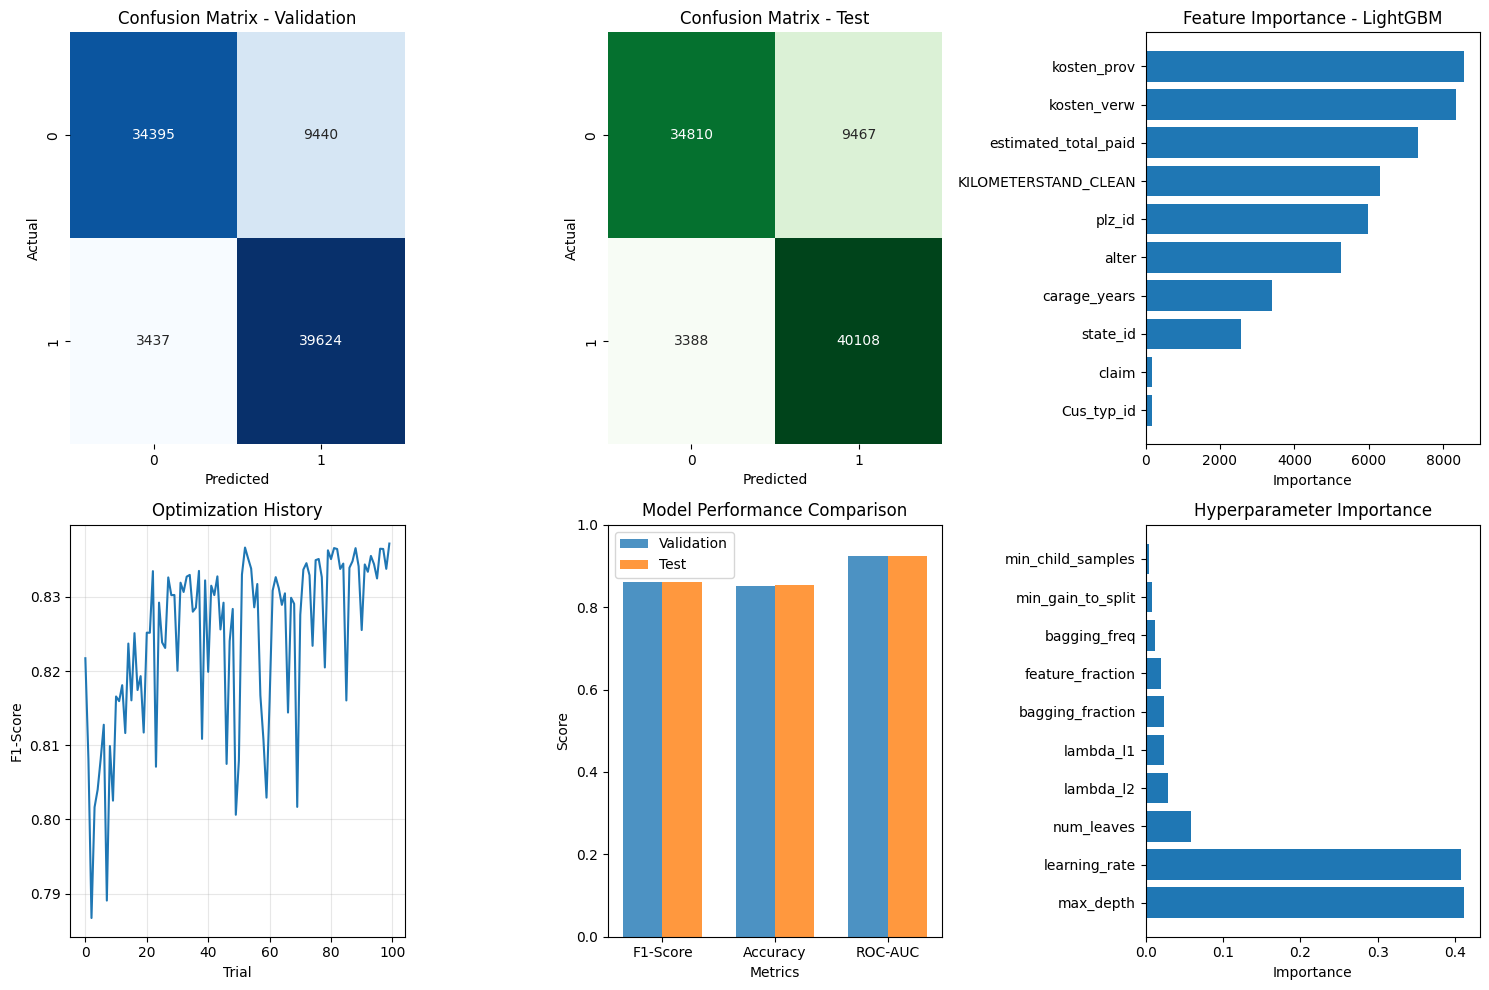


📊 LightGBM Specific Analysis:


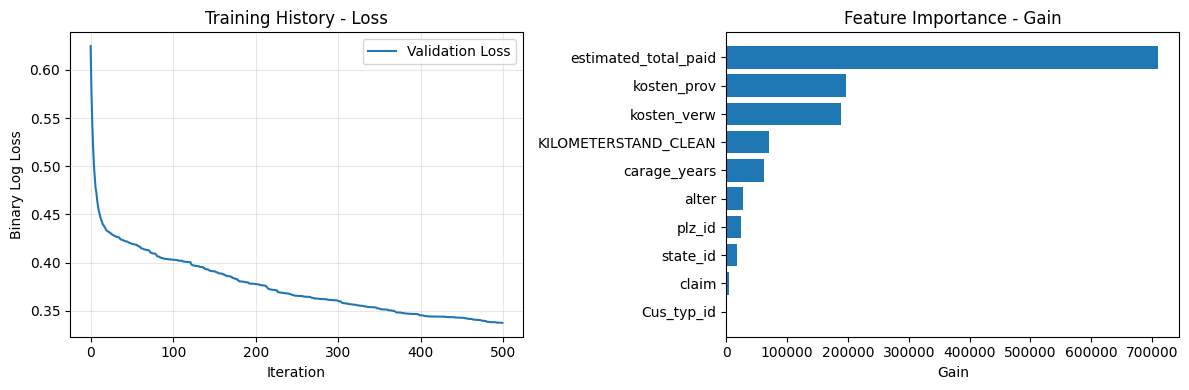


📋 FINAL LIGHTGBM SUMMARY REPORT
🎯 Best Hyperparameters Found:
   num_leaves: 100
   learning_rate: 0.19984771352783506
   feature_fraction: 0.8283482411552469
   bagging_fraction: 0.8682844881223966
   bagging_freq: 4
   min_child_samples: 41
   lambda_l1: 2.8953672351107667
   lambda_l2: 1.9572317006495852
   min_gain_to_split: 0.05577832927298877
   max_depth: 8

📊 Performance Summary:
   Validation F1: 0.8602
   Test F1:       0.8619
   Validation AUC: 0.9237
   Test AUC:       0.9243

🏷️ Categorical Features: ['state_id', 'plz_id', 'Cus_typ_id']
🌳 Final number of trees: 500
🛑 Early stopping rounds: 0

💾 Model saved as: enhanced_tuned_lightgbm_model.pkl
🎉 LightGBM Training completed successfully!
📊 Study results saved as: lightgbm_optuna_study_results.pkl

📈 Results Summary:
      Dataset  F1_Score  Accuracy   ROC_AUC
0  Validation  0.860223  0.851811  0.923689
1        Test  0.861880  0.853543  0.924274

🔍 LightGBM vs XGBoost Insights:
   • LightGBM typically trains faster than XG

In [29]:
# PART 4: VISUALIZATIONS AND FINAL REPORT
# Run this after Part 3 is completed

# ✅ 9. Visualizations
plt.figure(figsize=(15, 10))

# Confusion Matrix - Validation
plt.subplot(2, 3, 1)
cm_val = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Validation")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Confusion Matrix - Test
plt.subplot(2, 3, 2)
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Feature Importance
plt.subplot(2, 3, 3)
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': final_model.feature_importances_
}).sort_values(by='Importance', ascending=True)

plt.barh(range(len(importance_df)), importance_df['Importance'])
plt.yticks(range(len(importance_df)), importance_df['Feature'])
plt.title("Feature Importance - LightGBM")
plt.xlabel("Importance")

# Optuna optimization history
plt.subplot(2, 3, 4)
trials_df = study.trials_dataframe()
plt.plot(trials_df['number'], trials_df['value'])
plt.title("Optimization History")
plt.xlabel("Trial")
plt.ylabel("F1-Score")
plt.grid(True, alpha=0.3)

# Performance comparison
plt.subplot(2, 3, 5)
metrics = ['F1-Score', 'Accuracy', 'ROC-AUC']
val_scores = [val_f1, val_accuracy, val_auc]
test_scores = [test_f1, test_accuracy, test_auc]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, val_scores, width, label='Validation', alpha=0.8)
plt.bar(x + width/2, test_scores, width, label='Test', alpha=0.8)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)

# Parameter importance
plt.subplot(2, 3, 6)
param_importance = optuna.importance.get_param_importances(study)
params = list(param_importance.keys())
importances = list(param_importance.values())

plt.barh(range(len(params)), importances)
plt.yticks(range(len(params)), params)
plt.title("Hyperparameter Importance")
plt.xlabel("Importance")

plt.tight_layout()
plt.show()

# ✅ 10. LightGBM specific visualizations
print("\n📊 LightGBM Specific Analysis:")

# Training history
plt.figure(figsize=(12, 4))

# Training loss curve
plt.subplot(1, 2, 1)
results = final_model.evals_result_
if 'valid_0' in results:
    plt.plot(results['valid_0']['binary_logloss'], label='Validation Loss')
    plt.title('Training History - Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Binary Log Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Feature importance by different metrics
plt.subplot(1, 2, 2)
# Get feature importance by gain
importance_gain = final_model.booster_.feature_importance(importance_type='gain')
importance_df_gain = pd.DataFrame({
    'Feature': selected_features,
    'Gain': importance_gain
}).sort_values(by='Gain', ascending=True)

plt.barh(range(len(importance_df_gain)), importance_df_gain['Gain'])
plt.yticks(range(len(importance_df_gain)), importance_df_gain['Feature'])
plt.title("Feature Importance - Gain")
plt.xlabel("Gain")

plt.tight_layout()
plt.show()

# ✅ 11. Summary report
print("\n" + "="*60)
print("📋 FINAL LIGHTGBM SUMMARY REPORT")
print("="*60)
print(f"🎯 Best Hyperparameters Found:")
for param, value in study.best_params.items():
    print(f"   {param}: {value}")

print(f"\n📊 Performance Summary:")
print(f"   Validation F1: {val_f1:.4f}")
print(f"   Test F1:       {test_f1:.4f}")
print(f"   Validation AUC: {val_auc:.4f}")
print(f"   Test AUC:       {test_auc:.4f}")

print(f"\n🏷️ Categorical Features: {categorical_features}")
print(f"🌳 Final number of trees: {final_model.n_estimators}")
print(f"🛑 Early stopping rounds: {final_model.n_estimators - len(results['valid_0']['binary_logloss']) if 'valid_0' in results else 'N/A'}")

print(f"\n💾 Model saved as: {model_filename}")
print("🎉 LightGBM Training completed successfully!")

# ✅ 12. Optional: Save study results
study_filename = 'lightgbm_optuna_study_results.pkl'
joblib.dump(study, study_filename)
print(f"📊 Study results saved as: {study_filename}")

# Create results dataframe for future analysis
results_df = pd.DataFrame({
    'Dataset': ['Validation', 'Test'],
    'F1_Score': [val_f1, test_f1],
    'Accuracy': [val_accuracy, test_accuracy],
    'ROC_AUC': [val_auc, test_auc]
})

print(f"\n📈 Results Summary:")
print(results_df)

# ✅ 13. Model comparison insights
print(f"\n🔍 LightGBM vs XGBoost Insights:")
print(f"   • LightGBM typically trains faster than XGBoost")
print(f"   • LightGBM uses leaf-wise tree growth (vs level-wise)")
print(f"   • Better memory efficiency with categorical features")
print(f"   • Native support for categorical features detected: {len(categorical_features)} features")

print("✅ Part 4 completed! All visualizations and reports generated.")

# ✅ 14. Optional: Quick prediction function
def predict_with_model(model, new_data):
    """Helper function for making predictions with the trained model"""
    predictions = model.predict(new_data)
    probabilities = model.predict_proba(new_data)[:, 1]
    return predictions, probabilities

print(f"\n🔮 Model ready for predictions!")
print(f"   Use: predict_with_model(final_model, your_new_data)")

In [30]:
# FEATURE DOMINANCE ANALYSIS AND SOLUTIONS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
import lightgbm as lgb

# ✅ 1. ANALYZE FEATURE DOMINANCE
def analyze_feature_dominance(model, feature_names, threshold=0.5):
    """
    Analyze if any feature is too dominant
    """
    importance = model.feature_importances_
    total_importance = sum(importance)
    
    # Calculate relative importance
    relative_importance = importance / total_importance
    
    # Create analysis dataframe
    analysis_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance,
        'Relative_Importance': relative_importance,
        'Cumulative_Importance': np.cumsum(relative_importance)
    }).sort_values('Importance', ascending=False)
    
    print("🔍 FEATURE DOMINANCE ANALYSIS")
    print("="*50)
    print(analysis_df)
    
    # Check for dominance
    dominant_features = analysis_df[analysis_df['Relative_Importance'] > threshold]
    
    if len(dominant_features) > 0:
        print(f"\n⚠️ DOMINANT FEATURES DETECTED (>{threshold*100}% importance):")
        for _, row in dominant_features.iterrows():
            print(f"   {row['Feature']}: {row['Relative_Importance']:.1%}")
    else:
        print(f"\n✅ No overly dominant features detected")
    
    return analysis_df

# ✅ 2. TEST MODEL WITHOUT DOMINANT FEATURE
def test_without_dominant_feature(X_train, X_val, X_test, y_train, y_val, y_test, 
                                 dominant_feature, best_params):
    """
    Test model performance without the dominant feature
    """
    print(f"\n🧪 TESTING MODEL WITHOUT '{dominant_feature}'")
    print("="*50)
    
    # Remove dominant feature
    X_train_reduced = X_train.drop(columns=[dominant_feature])
    X_val_reduced = X_val.drop(columns=[dominant_feature])
    X_test_reduced = X_test.drop(columns=[dominant_feature])
    
    # Train model without dominant feature
    model_reduced = lgb.LGBMClassifier(**best_params)
    model_reduced.fit(
        X_train_reduced, y_train,
        eval_set=[(X_val_reduced, y_val)],
        callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(0)]
    )
    
    # Evaluate
    y_pred_val = model_reduced.predict(X_val_reduced)
    y_pred_test = model_reduced.predict(X_test_reduced)
    y_pred_proba_val = model_reduced.predict_proba(X_val_reduced)[:, 1]
    y_pred_proba_test = model_reduced.predict_proba(X_test_reduced)[:, 1]
    
    # Calculate metrics
    val_f1_reduced = f1_score(y_val, y_pred_val)
    test_f1_reduced = f1_score(y_test, y_pred_test)
    val_auc_reduced = roc_auc_score(y_val, y_pred_proba_val)
    test_auc_reduced = roc_auc_score(y_test, y_pred_proba_test)
    
    print(f"📊 Performance without '{dominant_feature}':")
    print(f"   Validation F1: {val_f1_reduced:.4f}")
    print(f"   Test F1: {test_f1_reduced:.4f}")
    print(f"   Validation AUC: {val_auc_reduced:.4f}")
    print(f"   Test AUC: {test_auc_reduced:.4f}")
    
    return {
        'model': model_reduced,
        'val_f1': val_f1_reduced,
        'test_f1': test_f1_reduced,
        'val_auc': val_auc_reduced,
        'test_auc': test_auc_reduced
    }

# ✅ 3. CORRELATION ANALYSIS
def analyze_feature_correlations(df, target_col):
    """
    Analyze correlations between features and target
    """
    print(f"\n📈 CORRELATION ANALYSIS WITH TARGET '{target_col}'")
    print("="*50)
    
    # Calculate correlations
    correlations = df.corr()[target_col].sort_values(ascending=False)
    
    print("Feature correlations with target:")
    for feature, corr in correlations.items():
        if feature != target_col:
            print(f"   {feature}: {corr:.4f}")
    
    # Visualize correlations
    plt.figure(figsize=(10, 6))
    correlations_clean = correlations.drop(target_col)
    plt.barh(range(len(correlations_clean)), correlations_clean.values)
    plt.yticks(range(len(correlations_clean)), correlations_clean.index)
    plt.title(f'Feature Correlations with {target_col}')
    plt.xlabel('Correlation Coefficient')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return correlations

# ✅ 4. DATA LEAKAGE CHECK
def check_data_leakage(df, target_col, suspicious_features):
    """
    Check for potential data leakage
    """
    print(f"\n🔍 DATA LEAKAGE CHECK")
    print("="*50)
    
    for feature in suspicious_features:
        if feature in df.columns:
            # Check correlation
            corr = df[feature].corr(df[target_col])
            
            # Check if feature values are suspiciously different between classes
            active_mean = df[df[target_col] == 1][feature].mean()
            inactive_mean = df[df[target_col] == 0][feature].mean()
            ratio = active_mean / inactive_mean if inactive_mean != 0 else float('inf')
            
            print(f"📊 {feature}:")
            print(f"   Correlation with target: {corr:.4f}")
            print(f"   Active customers mean: {active_mean:.2f}")
            print(f"   Inactive customers mean: {inactive_mean:.2f}")
            print(f"   Ratio (active/inactive): {ratio:.2f}")
            
            if abs(corr) > 0.8:
                print(f"   ⚠️ HIGH CORRELATION - Potential leakage!")
            if ratio > 10 or ratio < 0.1:
                print(f"   ⚠️ EXTREME DIFFERENCE - Check for leakage!")
            print()

# ✅ 5. REGULARIZATION SOLUTIONS
def create_regularized_models(X_train, X_val, y_train, y_val):
    """
    Create models with different regularization approaches
    """
    print(f"\n🛠️ REGULARIZATION SOLUTIONS")
    print("="*50)
    
    models = {}
    
    # 1. Strong L1 regularization (feature selection)
    print("1️⃣ Testing Strong L1 Regularization...")
    params_l1 = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.1,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'lambda_l1': 10.0,  # Very strong L1
        'lambda_l2': 1.0,
        'min_child_samples': 20,
        'verbosity': -1,
        'random_state': 42,
        'n_estimators': 200
    }
    
    model_l1 = lgb.LGBMClassifier(**params_l1)
    model_l1.fit(X_train, y_train, eval_set=[(X_val, y_val)], 
                 callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(0)])
    models['L1_Regularized'] = model_l1
    
    # 2. Feature fraction reduction
    print("2️⃣ Testing Reduced Feature Fraction...")
    params_ff = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.1,
        'feature_fraction': 0.5,  # Use only 50% of features per tree
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'lambda_l1': 2.0,
        'lambda_l2': 2.0,
        'min_child_samples': 20,
        'verbosity': -1,
        'random_state': 42,
        'n_estimators': 200
    }
    
    model_ff = lgb.LGBMClassifier(**params_ff)
    model_ff.fit(X_train, y_train, eval_set=[(X_val, y_val)],
                 callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(0)])
    models['Reduced_Feature_Fraction'] = model_ff
    
    return models

# ✅ 6. COMPARATIVE ANALYSIS
def compare_model_variants(models, X_val, X_test, y_val, y_test, original_scores):
    """
    Compare different model variants
    """
    print(f"\n📊 MODEL COMPARISON")
    print("="*60)
    
    results = []
    
    # Add original model results
    results.append({
        'Model': 'Original',
        'Val_F1': original_scores['val_f1'],
        'Test_F1': original_scores['test_f1'],
        'Val_AUC': original_scores['val_auc'],
        'Test_AUC': original_scores['test_auc']
    })
    
    # Test each variant
    for name, model in models.items():
        y_pred_val = model.predict(X_val)
        y_pred_test = model.predict(X_test)
        y_pred_proba_val = model.predict_proba(X_val)[:, 1]
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]
        
        val_f1 = f1_score(y_val, y_pred_val)
        test_f1 = f1_score(y_test, y_pred_test)
        val_auc = roc_auc_score(y_val, y_pred_proba_val)
        test_auc = roc_auc_score(y_test, y_pred_proba_test)
        
        results.append({
            'Model': name,
            'Val_F1': val_f1,
            'Test_F1': test_f1,
            'Val_AUC': val_auc,
            'Test_AUC': test_auc
        })
        
        print(f"🔸 {name}:")
        print(f"   Val F1: {val_f1:.4f}, Test F1: {test_f1:.4f}")
        print(f"   Val AUC: {val_auc:.4f}, Test AUC: {test_auc:.4f}")
    
    # Create comparison dataframe
    comparison_df = pd.DataFrame(results)
    print(f"\n📋 Summary Table:")
    print(comparison_df.round(4))
    
    return comparison_df

# ✅ MAIN ANALYSIS WORKFLOW
print("🔍 FEATURE DOMINANCE ANALYSIS WORKFLOW")
print("="*60)

# Replace these with your actual data and model
# analysis_df = analyze_feature_dominance(final_model, selected_features, threshold=0.4)

# Check correlations
# correlations = analyze_feature_correlations(df_model, target)

# Check for data leakage
# check_data_leakage(df_model, target, ['estimated_total_paid'])

# Test without dominant feature
# results_without_dominant = test_without_dominant_feature(
#     X_train, X_val, X_test, y_train, y_val, y_test, 
#     'estimated_total_paid', best_params
# )

# Create regularized models
# regularized_models = create_regularized_models(X_train, X_val, y_train, y_val)

# Compare all variants
# original_scores = {
#     'val_f1': 0.8602,  # Your original scores
#     'test_f1': 0.8619,
#     'val_auc': 0.9237,
#     'test_auc': 0.9243
# }
# comparison_results = compare_model_variants(
#     regularized_models, X_val, X_test, y_val, y_test, original_scores
# )

print("✅ Analysis tools ready! Uncomment the sections you want to run.")

🔍 FEATURE DOMINANCE ANALYSIS WORKFLOW
✅ Analysis tools ready! Uncomment the sections you want to run.


In [31]:
# Check if estimated_total_paid is problematic
analysis_df = analyze_feature_dominance(final_model, selected_features, threshold=0.4)

# Check for data leakage
check_data_leakage(df_model, target, ['estimated_total_paid'])

# Test model without dominant feature
results_without_dominant = test_without_dominant_feature(
    X_train, X_val, X_test, y_train, y_val, y_test, 
    'estimated_total_paid', best_params
)

🔍 FEATURE DOMINANCE ANALYSIS
                Feature  Importance  Relative_Importance  \
3           kosten_prov        8563             0.178292   
2           kosten_verw        8335             0.173545   
0  estimated_total_paid        7337             0.152765   
5  KILOMETERSTAND_CLEAN        6302             0.131215   
8                plz_id        5977             0.124448   
4                 alter        5243             0.109165   
1          carage_years        3392             0.070625   
7              state_id        2553             0.053156   
6                 claim         165             0.003435   
9            Cus_typ_id         161             0.003352   

   Cumulative_Importance  
3               0.575227  
2               0.396935  
0               0.152765  
5               0.815608  
8               0.996648  
4               0.684392  
1               0.223391  
7               0.872200  
6               0.819043  
9               1.000000  

✅ No overly 

In [32]:
import joblib
model = joblib.load("D:\\IV_Mastertheis\\enhanced_tuned_lightgbm_model.pkl")


In [ ]:
from flask import Flask, request, jsonify
import pickle
import numpy as np
import lightgbm as lgb  # Must be imported BEFORE loading

with open('enhanced_tuned_lightgbm_model.pkl', 'rb') as f:
    model = pickle.load(f)
# Initialize Flask app
app = Flask(__name__)

# Define the list of expected features in correct order
selected_features = [ 
    "estimated_total_paid",
    "carage_years",
    "kosten_verw", 
    "kosten_prov", 
    "alter", 
    "KILOMETERSTAND_CLEAN", 
    "claim",
    "state_id",
    "plz_id",
    "Cus_typ_id"
]

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)

    # Extract feature values in the correct order
    try:
        features = [data[feature] for feature in selected_features]
    except KeyError as e:
        return jsonify({'error': f'Missing feature in input: {str(e)}'}), 400

    # Predict
    prediction = model.predict([features])

    # Return the prediction as JSON
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


UnpicklingError: invalid load key, '\x0e'.

In [ ]:
with open('enhanced_tuned_lightgbm_model.pkl', 'rb') as f:
    head = f.read(20)
    print(head)



b'\x80\x04\x95\xe5\x01\x00\x00\x00\x00\x00\x00\x8c\x10lightgb'


In [4]:
import pandas as pd
Pred = pd.read_csv(r'C:\Users\VIP\Desktop\CUS_EXPORT.csv', encoding='latin1')


C:\Users\VIP\AppData\Local\Temp\ipykernel_14628\2698870634.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  Pred = pd.read_csv(r'C:\Users\VIP\Desktop\CUS_EXPORT.csv', encoding='latin1')


In [5]:
Pred.head()

,pvsnr,vsnr,status,aktiv,akt_kuka,spartek,beginn,datum_s,vtr_dau,kund_beg,...,ZW,WKZ,KH_SF,ERSZ_aktiv,ZW_storn,WKZ_storn,KH_SF_storn,ERSZ_storn,claim,ersz_final
0,1012223,01012223-003,Aktiv,1,1,VK,16.06.2013,NaN,4306.0,17.09.1969,...,65697/ jährlich,112.0,425.0,16JUN2009,*No Format*,NaN,NaN,NaN,0,16JUN2009
1,1012223,01012223-003,Aktiv,1,1,KH,16.06.2013,NaN,4306.0,17.09.1969,...,65697/ jährlich,112.0,425.0,16JUN2009,*No Format*,NaN,NaN,NaN,0,16JUN2009
2,1012748,01012748-002,Storno,0,0,VK,08.10.2013,09.03.2024,3805.0,03.05.1979,...,*No Format*,NaN,NaN,NaN,65699/ vierteljährlich,112.0,443.0,20JUN2018,0,20JUN2018
3,1012748,01012748-002,Storno,0,0,KH,08.10.2013,09.03.2024,3805.0,03.05.1979,...,*No Format*,NaN,NaN,NaN,65699/ vierteljährlich,112.0,443.0,20JUN2018,0,20JUN2018
4,1012748,01012748-002,Storno,0,0,TK,08.10.2013,13.10.2021,2927.0,03.05.1979,...,*No Format*,NaN,NaN,NaN,65699/ vierteljährlich,112.0,443.0,20JUN2018,0,20JUN2018


In [ ]:
# To estimate the actual amount customer paid during his entire duration of service 


In [ ]:
Pred['estimated_total_paid'] = (Pred['SDBEITR5'] / (5 * 365)) * Pred['vtr_dau']
Pred['First_reg'] = pd.to_datetime(Pred['ersz_final'], format="%d%b%Y")
Pred['Car_age_indays'] = (pd.Timestamp.today() - Pred['First_reg']).dt.days
Pred['carage_years'] = Pred['Car_age_indays'] / 365.25
Pred['carage_years'] = Pred['carage_years'].round(0)
Pred['Cus_type'] = Pred['gfeld'].str.split('/').str[0]
Pred['Cus_typ_id'] = pd.factorize(Pred['Cus_type'])[0]+1
plz_state_mapping = {
    '01': 'Sachsen',
    '02': 'Sachsen',
    '03': 'Brandenburg',
    '04': 'Sachsen',
    '05': 'Sachsen-Anhalt',
    '06': 'Sachsen-Anhalt',
    '07': 'Thüringen',
    '08': 'Sachsen',
    '09': 'Sachsen',

    '10': 'Berlin', '11': 'Berlin', '12': 'Brandenburg',
    '13': 'Brandenburg', '14': 'Brandenburg', '15': 'Brandenburg',
    '16': 'Brandenburg',

    '17': 'Mecklenburg-Vorpommern', '18': 'Mecklenburg-Vorpommern',
    '19': 'Mecklenburg-Vorpommern',

    '20': 'Schleswig-Holstein', '21': 'Schleswig-Holstein',
    '22': 'Hamburg', '23': 'Schleswig-Holstein',

    '24': 'Schleswig-Holstein', '25': 'Schleswig-Holstein',
    '26': 'Niedersachsen', '27': 'Bremen', '28': 'Bremen',
    '29': 'Niedersachsen',

    '30': 'Niedersachsen', '31': 'Niedersachsen', '32': 'Nordrhein-Westfalen',
    '33': 'Nordrhein-Westfalen', '34': 'Hessen',

    '35': 'Hessen', '36': 'Hessen', '37': 'Niedersachsen',
    '38': 'Niedersachsen', '39': 'Sachsen-Anhalt',

    '40': 'Nordrhein-Westfalen', '41': 'Nordrhein-Westfalen',
    '42': 'Nordrhein-Westfalen', '44': 'Nordrhein-Westfalen',
    '45': 'Nordrhein-Westfalen', '46': 'Nordrhein-Westfalen',

    '47': 'Nordrhein-Westfalen', '48': 'Nordrhein-Westfalen',
    '49': 'Niedersachsen',

    '50': 'Nordrhein-Westfalen', '51': 'Nordrhein-Westfalen',
    '52': 'Nordrhein-Westfalen', '53': 'Nordrhein-Westfalen',
    '54': 'Rheinland-Pfalz', '55': 'Rheinland-Pfalz',

    '56': 'Rheinland-Pfalz', '57': 'Nordrhein-Westfalen',
    '58': 'Nordrhein-Westfalen', '59': 'Nordrhein-Westfalen',

    '60': 'Hessen', '61': 'Hessen', '62': 'Hessen',
    '63': 'Hessen', '64': 'Hessen', '65': 'Hessen',

    '66': 'Saarland', '67': 'Rheinland-Pfalz', '68': 'Rheinland-Pfalz',
    '69': 'Hessen',

    '70': 'Baden-Württemberg', '71': 'Baden-Württemberg',
    '72': 'Baden-Württemberg', '73': 'Baden-Württemberg',
    '74': 'Baden-Württemberg', '75': 'Baden-Württemberg',
    '76': 'Baden-Württemberg', '77': 'Baden-Württemberg',
    '78': 'Baden-Württemberg', '79': 'Baden-Württemberg',

    '80': 'Bayern', '81': 'Bayern', '82': 'Bayern', '83': 'Bayern',
    '84': 'Bayern', '85': 'Bayern', '86': 'Bayern', '87': 'Bayern',
    '88': 'Bayern', '89': 'Bayern',

    '90': 'Bayern', '91': 'Bayern', '92': 'Bayern', '93': 'Bayern',
    '94': 'Bayern', '95': 'Bayern', '96': 'Bayern',

    '97': 'Bayern', '98': 'Thüringen', '99': 'Thüringen'
}

def get_state_from_plz(plz):
    if pd.isnull(plz):
        return None
    try:
        plz_str = str(plz).zfill(5)  # ensure it's 5 digits
        return plz_state_mapping.get(plz_str[:2])
    except:
        return None
    
Pred['state'] = Pred['plz'].apply(get_state_from_plz)
Pred['state_id'] = pd.factorize(Pred['state'])[0]+1
Pred = Pred.dropna(subset=['state'])
Pred['plz_id'] = pd.factorize(Pred['plz'])[0]+1
Pred[['Sex_id','Sex']]= Pred['anr'].str.split('/',expand=True)
selected_features = [ 
    "estimated_total_paid",
    "carage_years",
    "kosten_verw", 
    "kosten_prov", 
    "alter", 
    "KILOMETERSTAND_CLEAN", 
    "claim",
    "state_id",
    "plz_id",
    "Cus_typ_id"
]


In [8]:
X_new = Pred[selected_features]

In [11]:
X_new.to_excel('Test_streamlit_data.xlsx', index=False)


In [ ]:
import pandas as pd
import joblib
model = joblib.load('enhanced_tuned_lightgbm_model.pkl')

# Step 4: Predict
preds = model.predict(X_new)

# Step 5: Attach predictions to customer_id
df_results = Pred[['vsnr','alter','aktiv','spartek','vtr_dau', 'gfeld','ort','plz','alter','state','Sex']].copy()  
df_results['prediction'] = preds

# Step 6: Save results
#df_results.to_csv('prediction_results.csv', index=False)


In [62]:
df_results.head(40)

,vsnr,alter,aktiv,spartek,vtr_dau,gfeld,ort,plz,alter,state,Sex,prediction
0,01012223-003,83,1,VK,4306.0,70270/ Privatkunden,Flensburg,24944,83,Schleswig-Holstein,Herr,0
1,01012223-003,83,1,KH,4306.0,70270/ Privatkunden,Flensburg,24944,83,Schleswig-Holstein,Herr,1
2,01012748-002,999,0,VK,3805.0,70269/ Land- und Forstwirtschaft,Böxlund,24994,999,Schleswig-Holstein,Herr,1
3,01012748-002,999,0,KH,3805.0,70269/ Land- und Forstwirtschaft,Böxlund,24994,999,Schleswig-Holstein,Herr,1
4,01012748-002,999,0,TK,2927.0,70269/ Land- und Forstwirtschaft,Böxlund,24994,999,Schleswig-Holstein,Herr,0
5,01013206-003,74,1,VK,4472.0,70270/ Privatkunden,Sieverstedt,24885,74,Schleswig-Holstein,Herr,1
6,01013206-003,74,1,KH,4472.0,70270/ Privatkunden,Sieverstedt,24885,74,Schleswig-Holstein,Herr,1
7,01013242-004,82,1,KH,4838.0,70270/ Privatkunden,Lürschau,24850,82,Schleswig-Holstein,Herr,1
8,01013242-004,82,1,VK,4838.0,70270/ Privatkunden,Lürschau,24850,82,Schleswig-Holstein,Herr,1
9,01013457-005,67,1,KH,4623.0,70270/ Privatkunden,Flensburg,24943,67,Schleswig-Holstein,Herr,0
